<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [244]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pprint as pprint
import warnings

warnings.filterwarnings('ignore')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [245]:
with open('sat_scores.csv') as csvfile:
    r = csv.reader(csvfile,delimiter=',')
    data_list = [[cell for cell in row] for row in r]
    data={data_list[0][col]:[data_list[1:][row][col] for row in range(len(data_list[1:]))] for col in range(len(data_list[0]))}

pp=pprint.pprint(data,indent=4,compact=True)




{   'Math': [   '510', '513', '515', '505', '516', '499', '499', '506', '500',
                '501', '499', '510', '499', '489', '501', '488', '474', '526',
                '499', '527', '499', '515', '510', '517', '525', '515', '542',
                '439', '539', '512', '542', '553', '542', '589', '550', '545',
                '572', '589', '580', '554', '568', '561', '577', '562', '596',
                '550', '570', '603', '582', '599', '551', '514'],
    'Rate': [   '82', '81', '79', '77', '72', '71', '71', '69', '69', '68',
                '67', '65', '65', '63', '60', '57', '56', '55', '54', '53',
                '53', '52', '51', '51', '34', '33', '31', '26', '23', '18',
                '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8',
                '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'],
    'State': [   'CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA',
                 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA',
      

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [246]:
df=pd.read_csv('sat_scores.csv')
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [247]:
df_fromdict=pd.DataFrame(data,columns=data.keys())
df_fromdict.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

<div class="alert alert-block alert-info">
<b> Answer </b>
</div>

Loading the file from the csv directly using pd.read_csv converts whole numbers into integers automatically. Using csv.reader leaves whole numbers as strings. 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [243]:
df.shape

(52, 8)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

<div class="alert alert-block alert-info">
<b> Answer </b>
</div>


| Variable Name |  Type   |Description|
| :----------:  | :-----: |:------------:|
|     State     |  String | State in which the test was taken|
|     Rate      | Integer | Participation rate in the SAT by state|
|    Verbal     | Integer | Average Verbal Scores per State |
|     Math      | Integer | Average Math Scores per State |

Rows=52, Column = 4



Verbal and Math scores need not be specifically average, but could be a central measure of all the scores aggregated by state eg. Median. We infer "Rate" as participation rates, and the distribution of participation rates across 51 states is largely similar to the data [in this study](https://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate). 'State' includes all 51 states in the US, as well as the nationwide scores so there are 52 observations in total, ie. 52 rows.



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

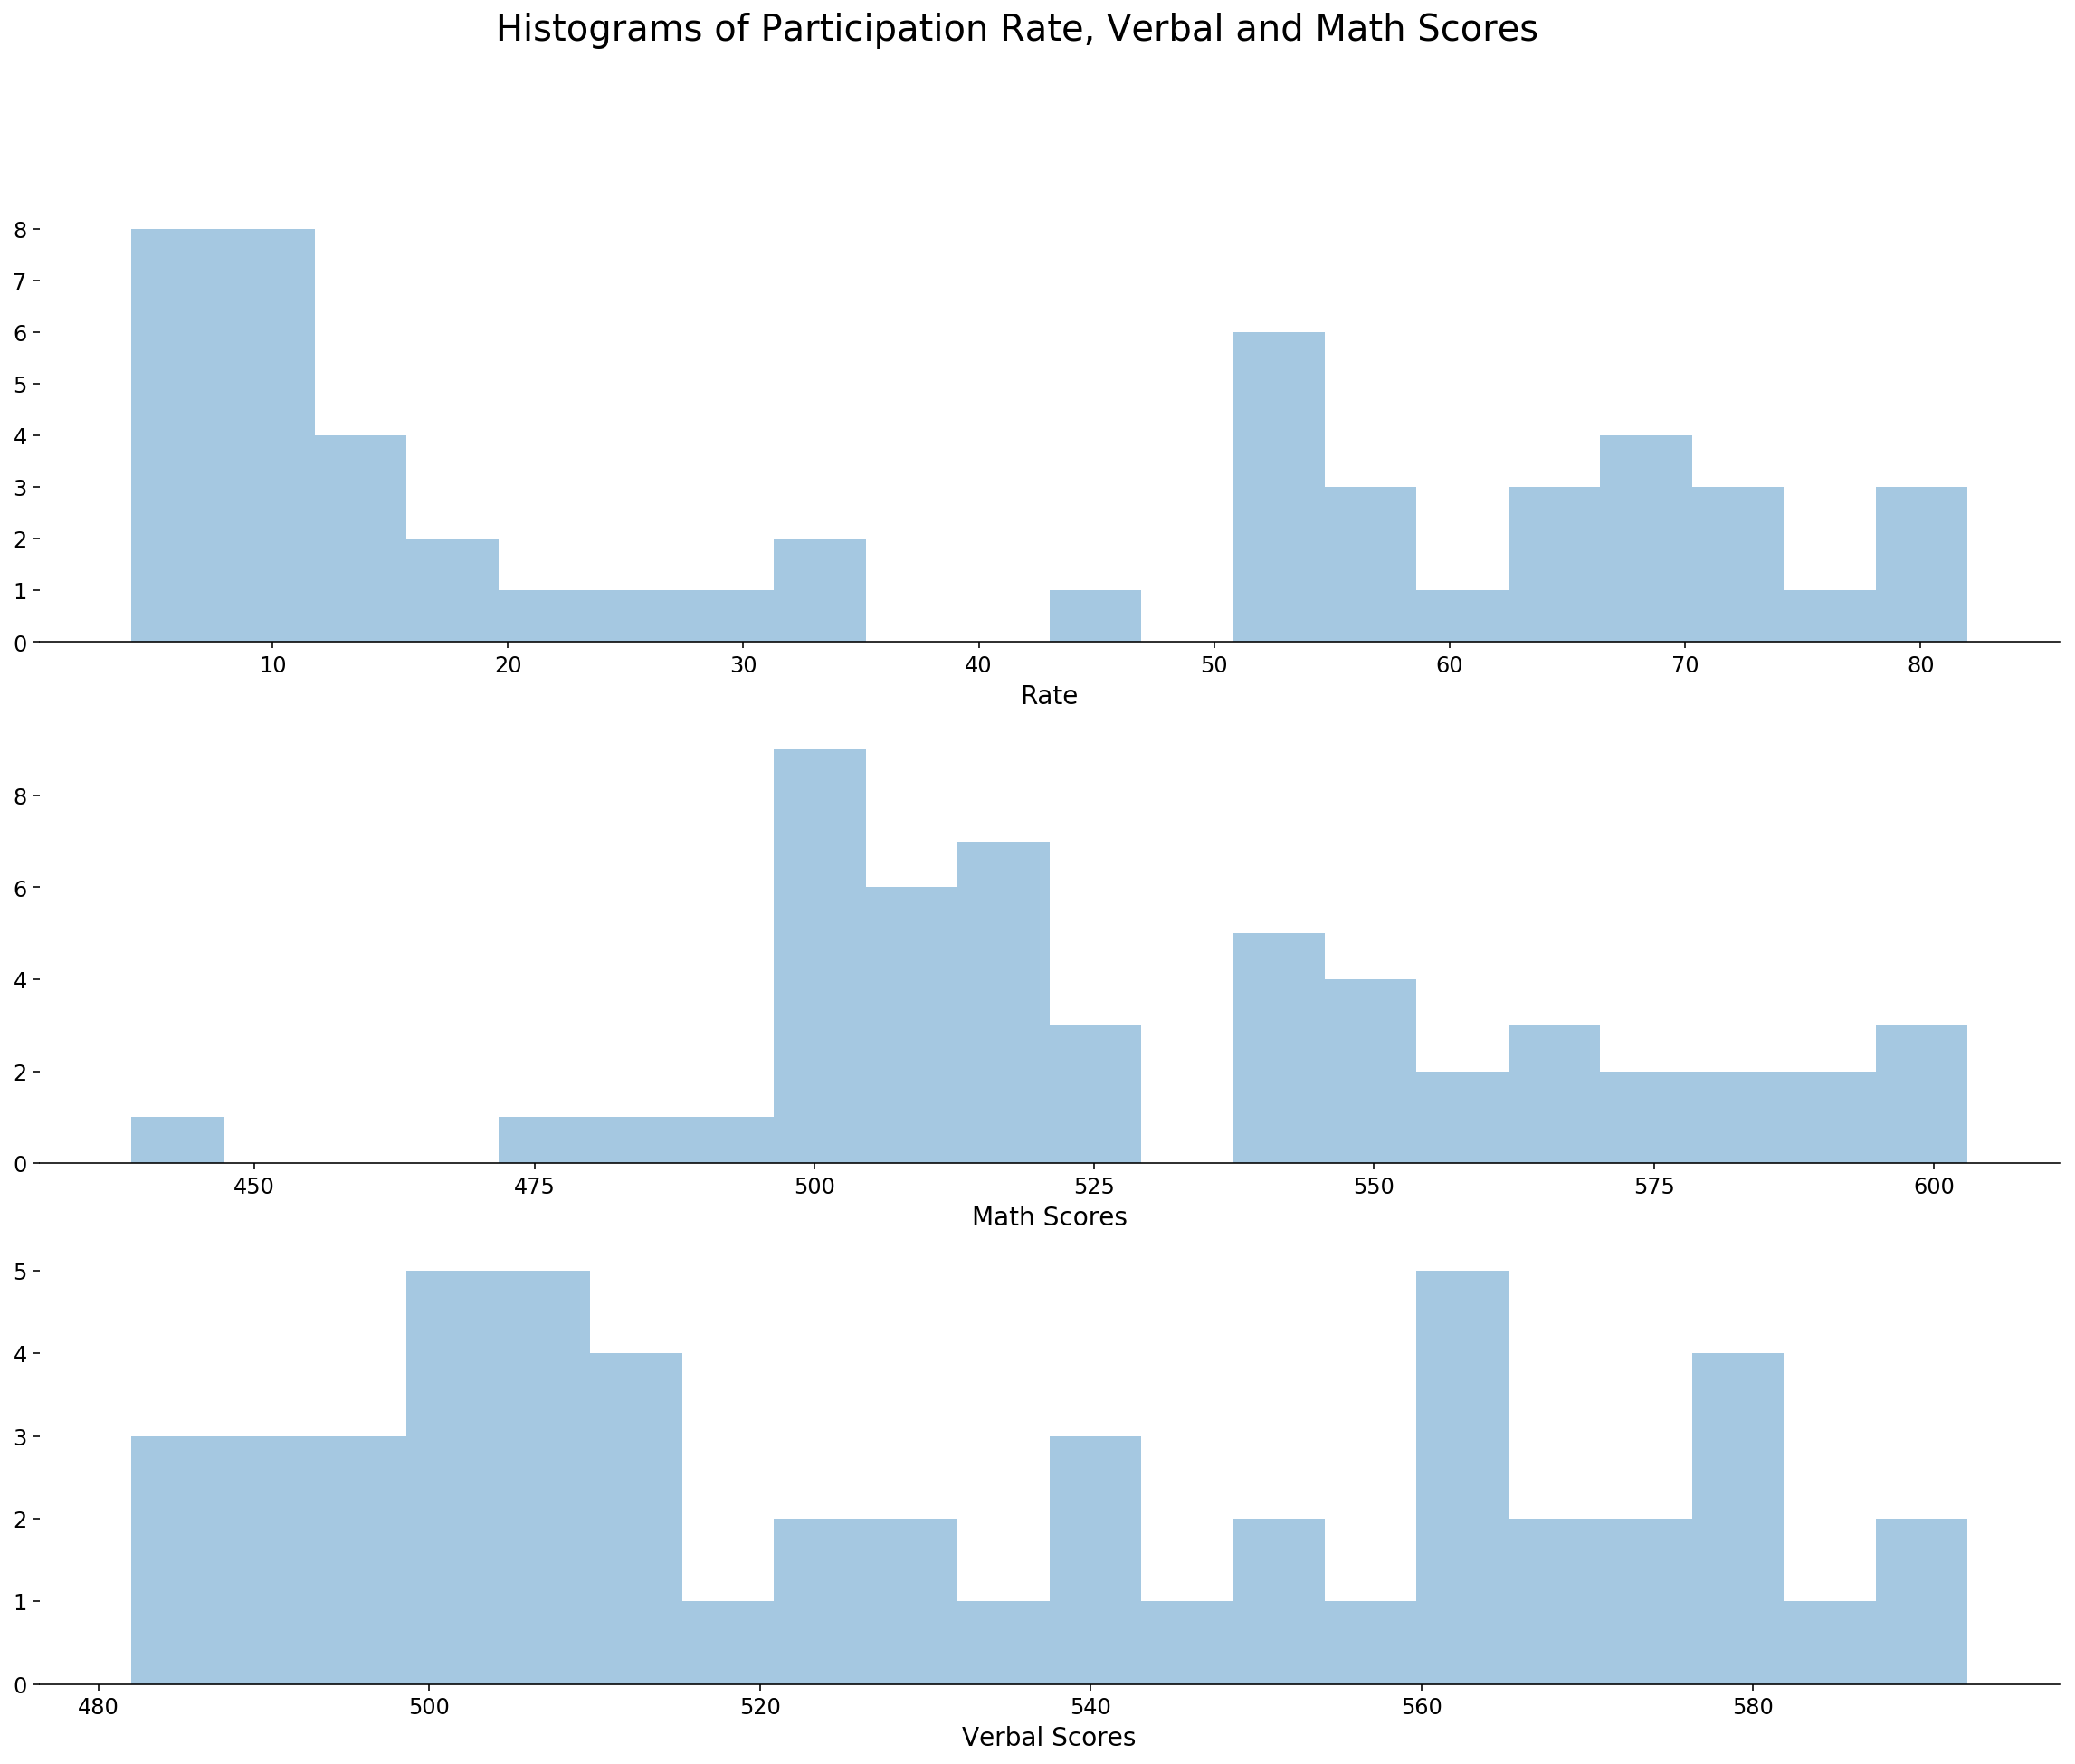

In [248]:
f, axes = plt.subplots(3,1, figsize=(20, 15))
f.suptitle('Histograms of Participation Rate, Verbal and Math Scores',fontsize=20)

sns.despine(left=True)

# Plot Participation rates # 
ax1=sns.distplot(df['Rate'],kde=False,ax=axes[0],bins=20)
ax1.set_xlabel('Rate',fontsize=14)
ax1.tick_params(labelsize=12)

# Plot Math scores # 
ax2=sns.distplot(df['Math'],kde=False,ax=axes[1],bins=20)
ax2.set_xlabel('Math Scores',fontsize=14)
ax2.tick_params(labelsize=12)

# Plot Verbal scores #
ax3=sns.distplot(df['Verbal'],kde=False,ax=axes[2],bins=20)
ax3.set_xlabel('Verbal Scores',fontsize=14)
ax3.tick_params(labelsize=12)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

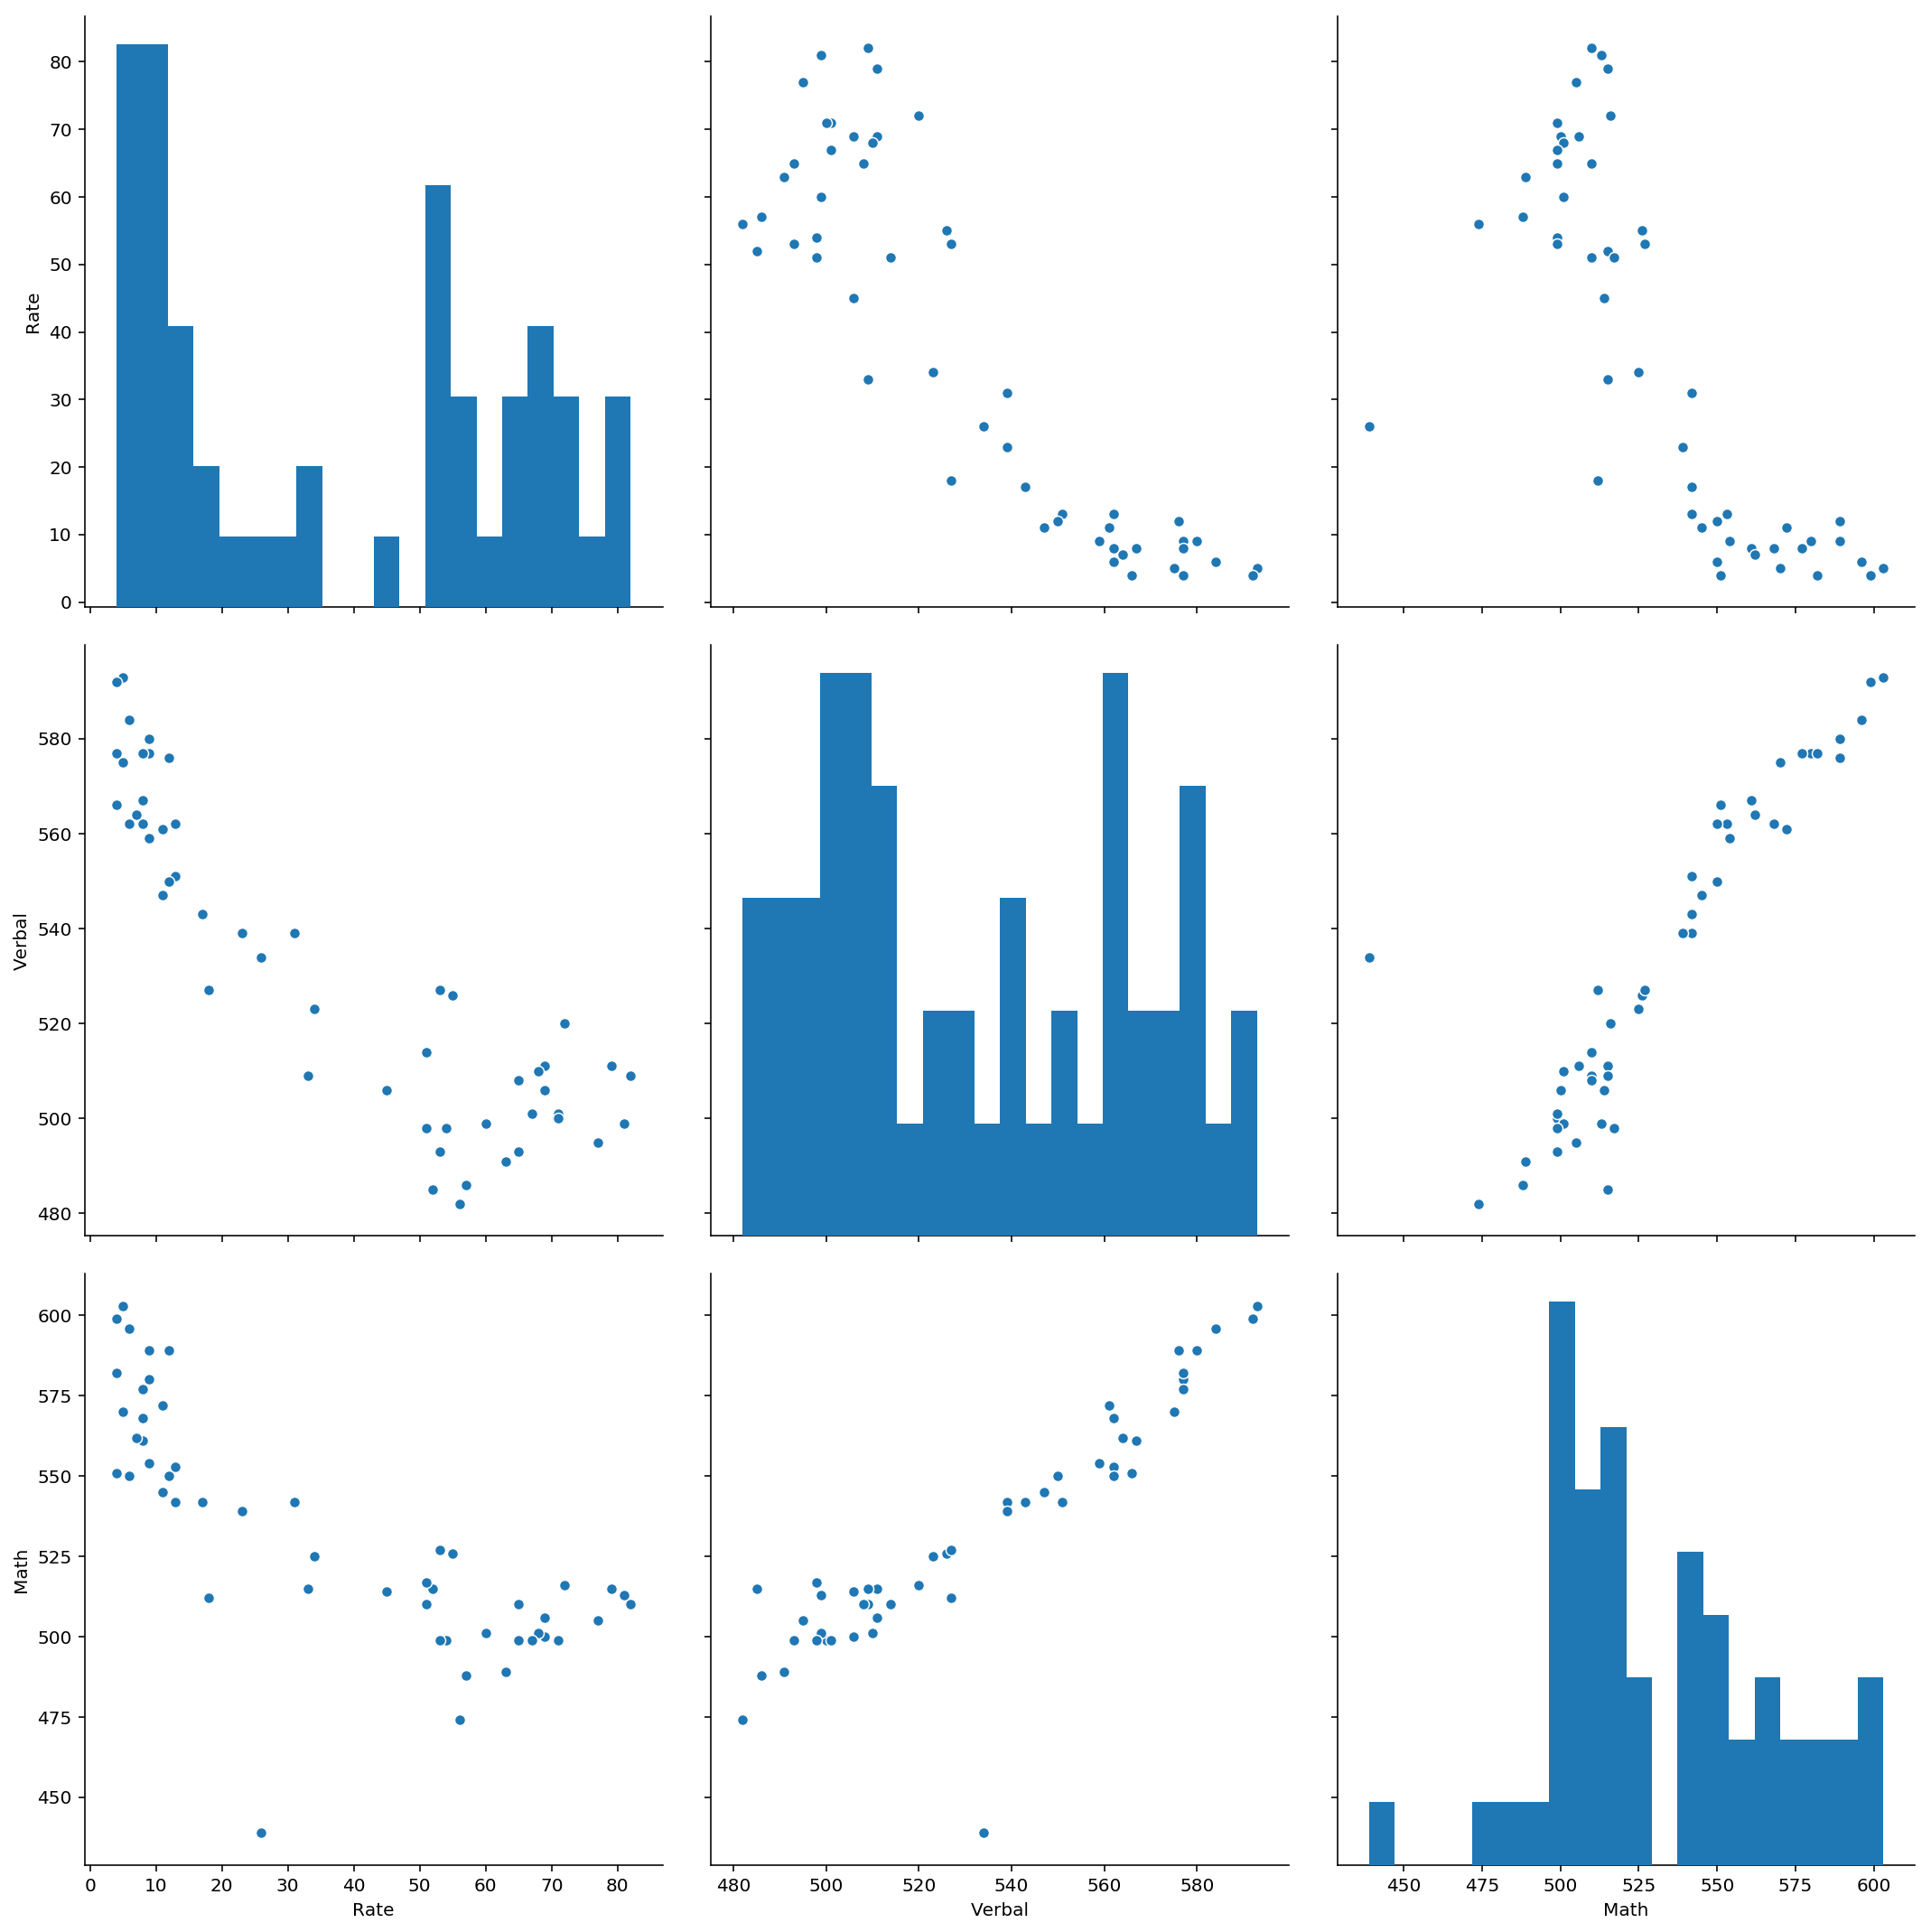

In [249]:
g=sns.pairplot(df, diag_kws=dict(bins=20),size=5,aspect=1)


<div class="alert alert-block alert-info">
<b> Answer </b>
</div>

There are apparent strong negative relationships between particiation rate and SAT scores in both the verbal and math sections. 

There is also an apparent strong positive relationship between Verbal and Math scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

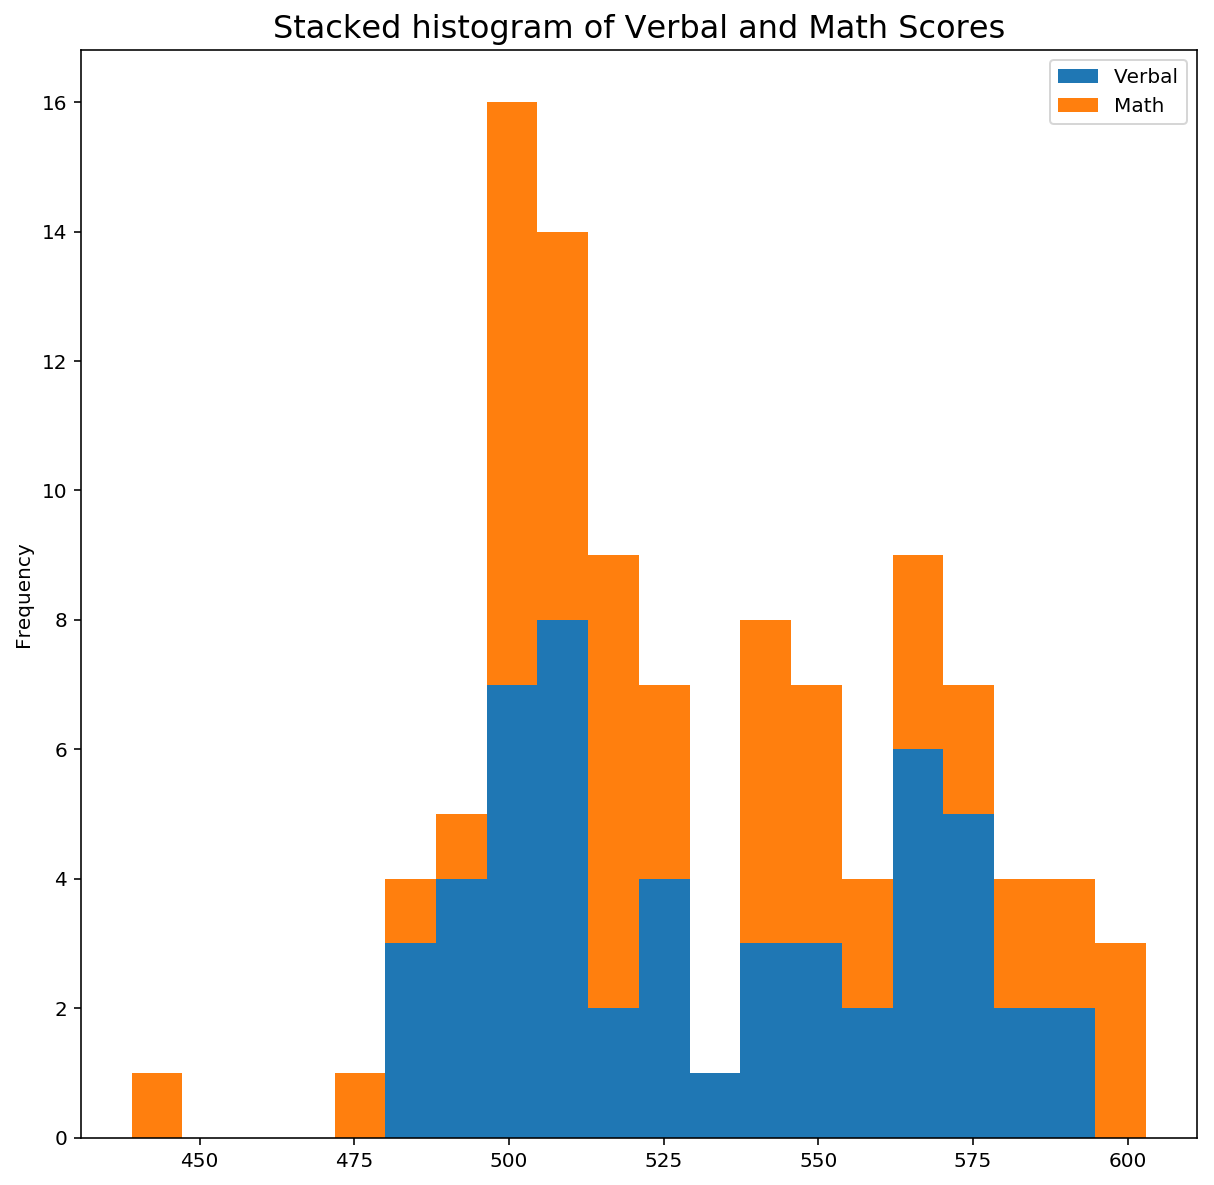

In [292]:
ax=df[['Verbal','Math']].plot.hist(stacked=True,bins=20,figsize=(10,10))
ax.set_title('Stacked histogram of Verbal and Math Scores',fontsize=16)
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

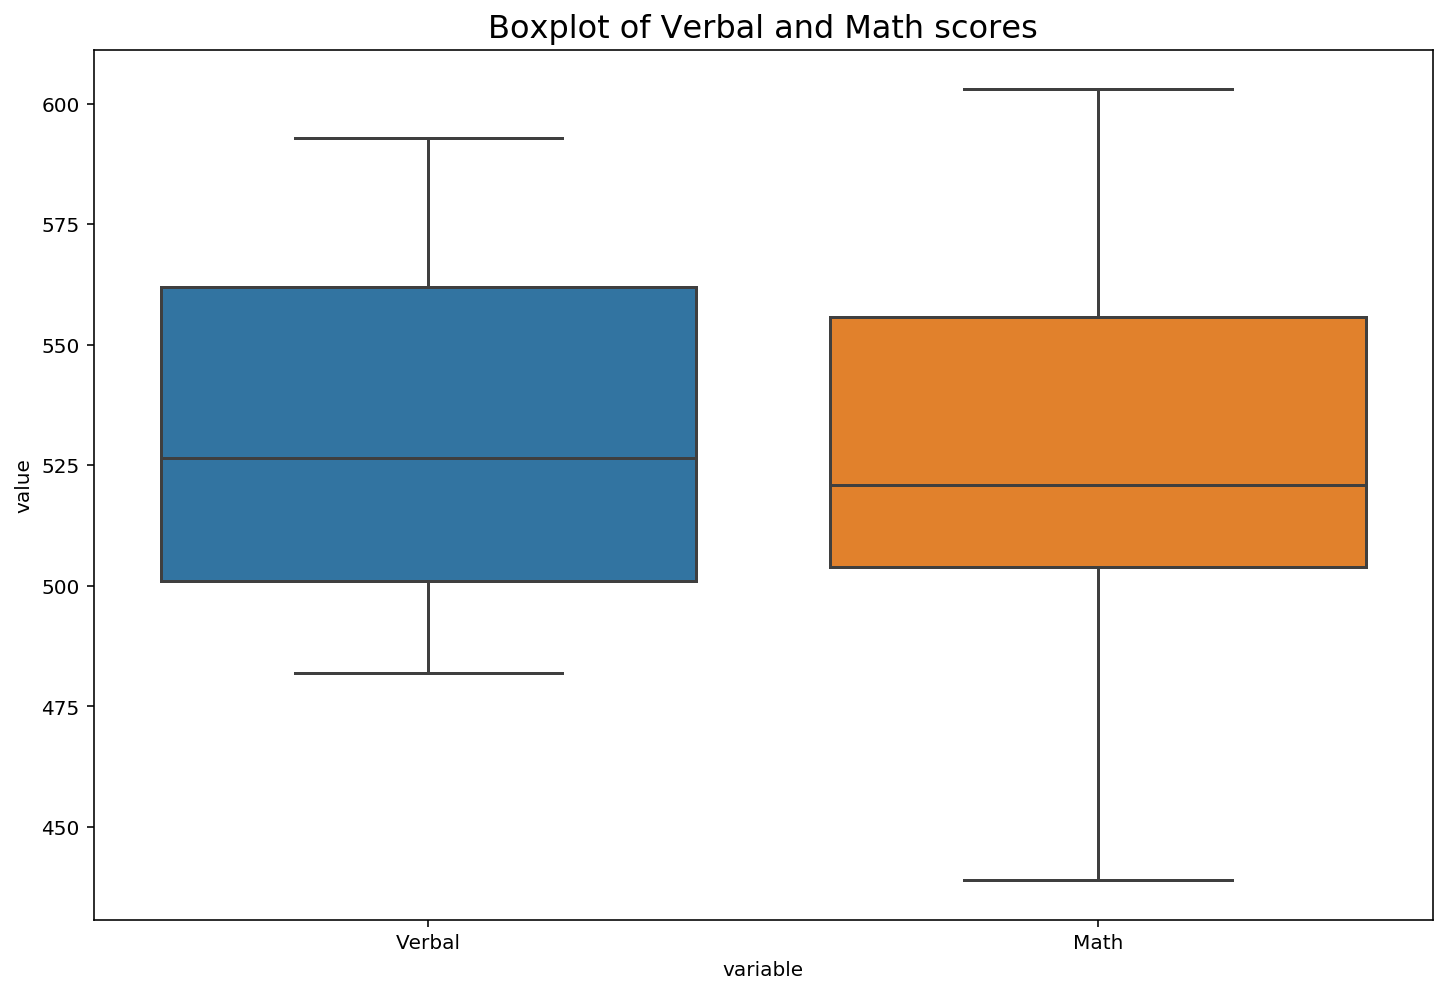

In [293]:
f,ax=plt.subplots(1,1,figsize=(12,8))

sns.boxplot(x='variable',y='value',data=pd.melt(df[['Verbal','Math']]))
ax.set_title('Boxplot of Verbal and Math scores',fontsize=16)
plt.show()

<div class="alert alert-block alert-info">
<b> Answer </b>
</div>

A boxplot allows us to look at more than one distribution at a time, eg. plotted by category as in the Verbal and Math example. 

`Rate` does not have the same scale as `Verbal` and `Math`, so we can't put them on the same boxplot

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 

In [253]:
# Normalise all variables by subtracting mean and dividing by standard deviation #

df['Verbal_norm']=df['Verbal'].apply(lambda x: (x-df['Verbal'].mean())/df['Verbal'].std())
df['Math_norm']=df['Math'].apply(lambda x: (x-df['Math'].mean())/df['Math'].std())
df['Rate_norm']=df['Rate'].apply(lambda x: (x-df['Rate'].mean())/df['Rate'].std())


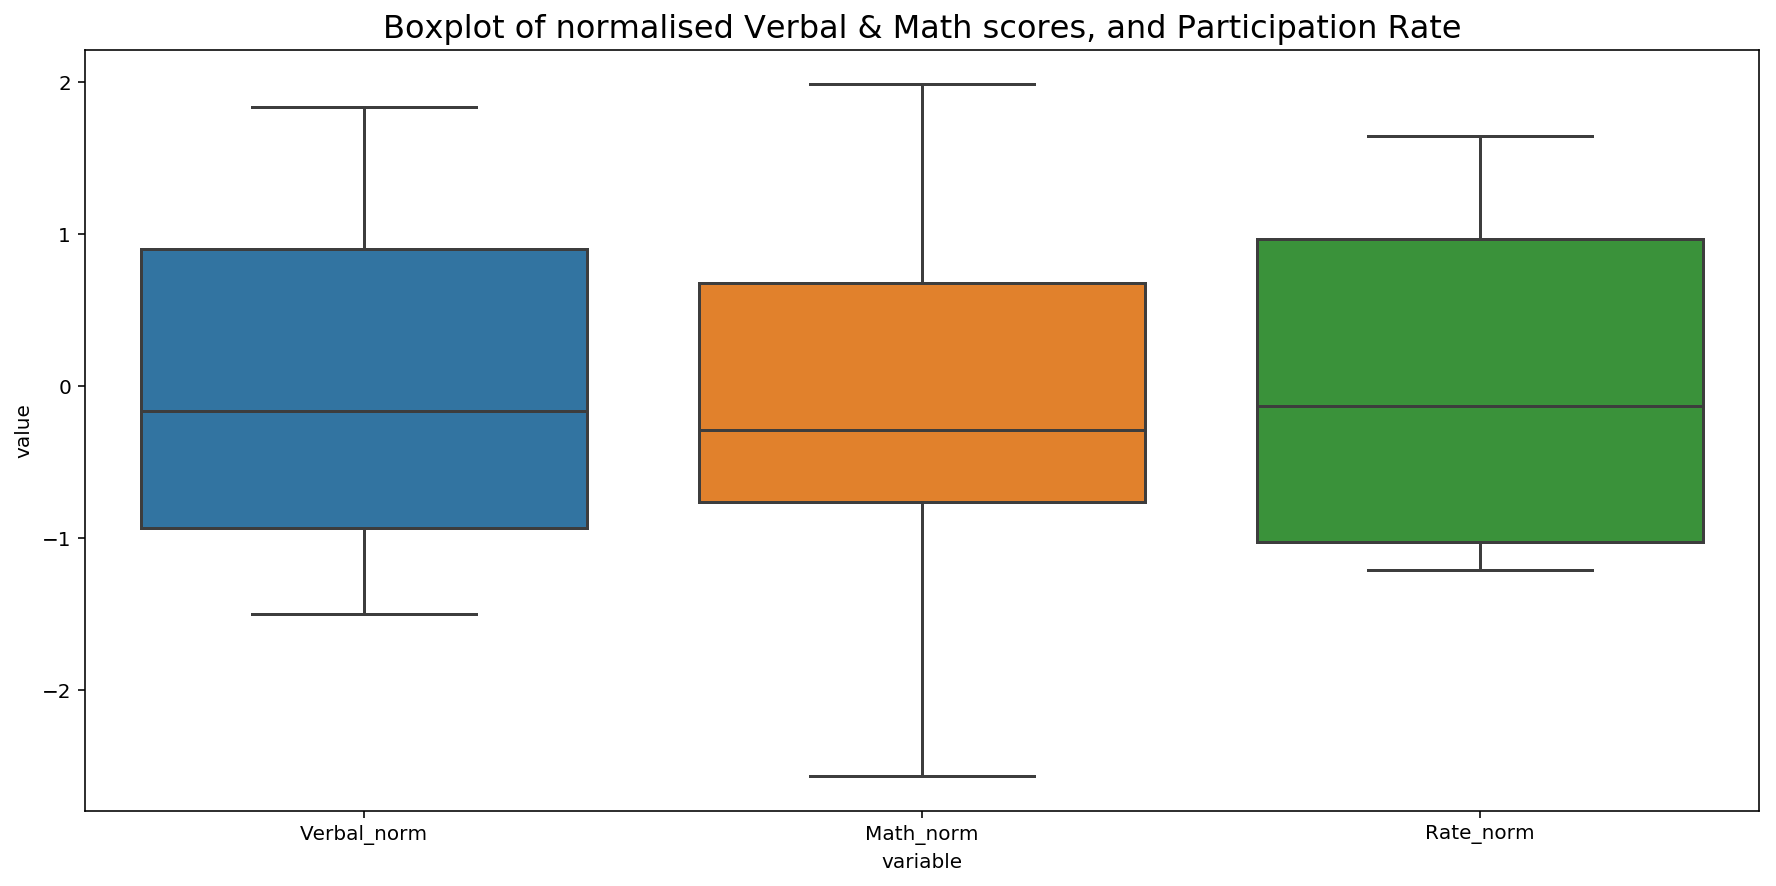

In [254]:
f,ax=plt.subplots(1,1,figsize=(15,7))

sns.boxplot(x='variable', y="value", data=pd.melt(df[['Verbal_norm','Math_norm','Rate_norm']]))
ax.set_title('Boxplot of normalised Verbal & Math scores, and Participation Rate',fontsize=16)

<div class="alert alert-block alert-info">
<b> Answer </b>
</div>

I've normalised the variables by subtracting the mean and dividing it by the sample standard deviation. This helps to centre the distributions around zero and put them on a similar scale. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [295]:
df['State'].loc[df['Verbal']>=df['Verbal'].mean(),].head()

26    CO
27    OH
28    MT
30    ID
31    TN
Name: State, dtype: object

In [13]:
print (str(len(df['State'].loc[df['Verbal']>=df['Verbal'].mean(),])) + ' states have verbal score above average across states') 

24 states have verbal score above average across states


<div class="alert alert-block alert-info">
<b> Answer </b>
</div>

24 out of 52 states have verbal score above average across the states (less than half), so the distribution is has a slight left skew. 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [296]:
df['State'].loc[df['Verbal']>=df['Verbal'].median(),].head()

19    WA
26    CO
27    OH
28    MT
29    WV
Name: State, dtype: object

In [15]:
print (str(len(df['State'].loc[df['Verbal']>=df['Verbal'].median(),])) + ' states have verbal score above median across states') 

26 states have verbal score above median across states


<div class="alert alert-block alert-info">
<b> Answer </b>
</div>

Exactly half of the states (26) have verbal scores above the median. Since the median is defined as the 50th percentile, it would split the data into two equal lengths if the number of observations is an even number. 

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [259]:
df['V-M']=df['Verbal']-df['Math']
df['V-M'].head()

0    -1
1   -14
2    -4
3   -10
4     4
Name: V-M, dtype: int64

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [17]:
verb_gr_math=df[['State','V-M']].sort_values(by='V-M',ascending=False)

In [18]:
df['M-V']=-df['V-M']
math_gr_verb=df[['State','M-V']].sort_values(by='M-V',ascending=False)

In [19]:
verb_gr_math.head(3)

,State,V-M
27,OH,95
50,MS,15
29,WV,15


In [20]:
math_gr_verb.head(3)

,State,M-V
21,HI,30
23,CA,19
1,NJ,14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [21]:
df.corr()

,Rate,Verbal,Math,Verbal_norm,Math_norm,V-M,M-V
Rate,1.000000,-0.886432,-0.773746,-0.886432,-0.773746,-0.101412,0.101412
Verbal,-0.886432,1.000000,0.899871,1.000000,0.899871,0.052600,-0.052600
Math,-0.773746,0.899871,1.000000,0.899871,1.000000,-0.388219,0.388219
Verbal_norm,-0.886432,1.000000,0.899871,1.000000,0.899871,0.052600,-0.052600
Math_norm,-0.773746,0.899871,1.000000,0.899871,1.000000,-0.388219,0.388219
V-M,-0.101412,0.052600,-0.388219,0.052600,-0.388219,1.000000,-1.000000
M-V,0.101412,-0.052600,0.388219,-0.052600,0.388219,-1.000000,1.000000


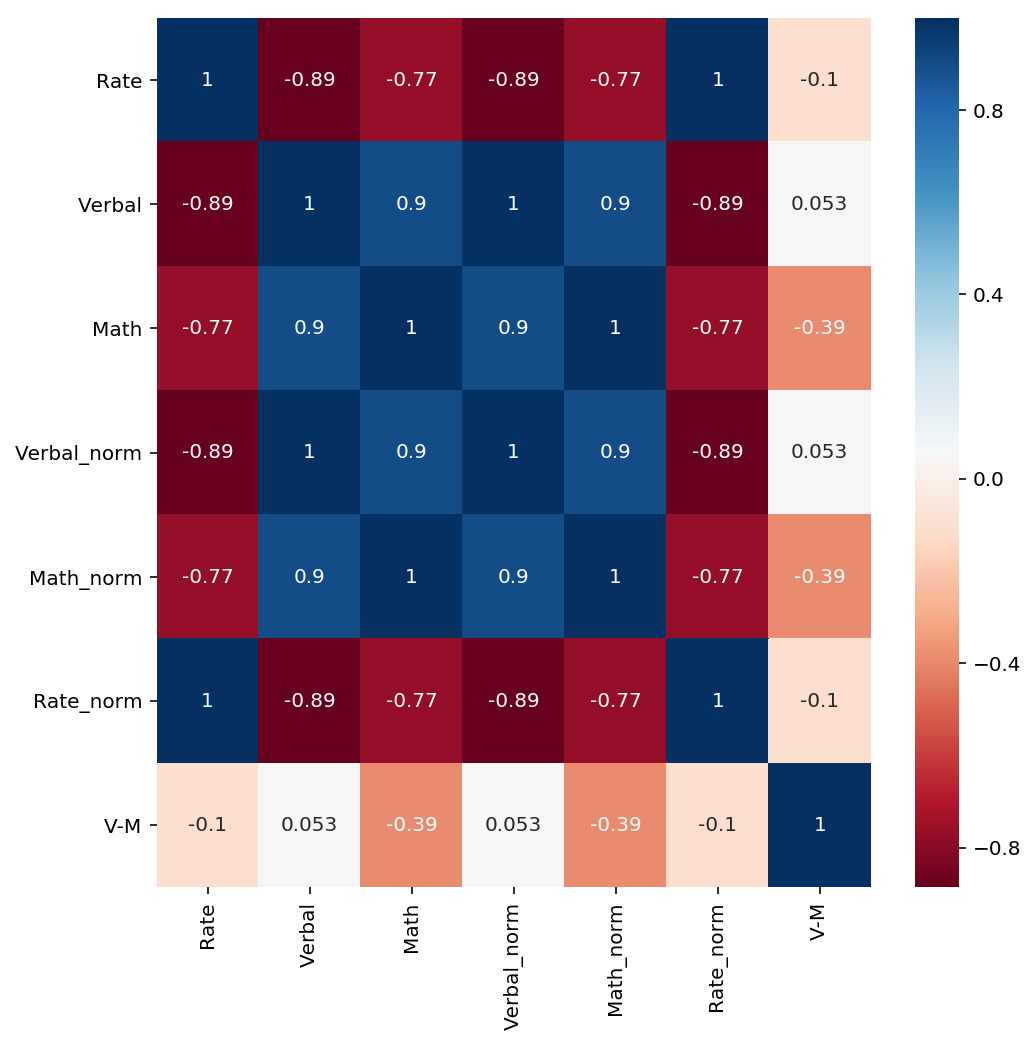

In [298]:
f,ax=plt.subplots(1,1,figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')

<div class="alert alert-block alert-info">
<b> Answer </b>
</div>

Math and Verbal scores have a strong positive correlation at 0.9. This adds evidence to the hypothesis that Math and Verbal skills are positively related.

Participation rate could be negatively correlated to the Math and Verbal scores as overall quality of students taking the test could be lower in states with higher participation rates. Those who have low participation rates usually elect to take the ACT instead, so students who elect to take the SAT would have been better prepared for it going into the test. 

I also note that normalised variables have the same pair-wise correlation as the original variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [22]:
df.describe()

,Rate,Verbal,Math,Verbal_norm,Math_norm,V-M,M-V
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,45.062370,56.402439,0.519231,-0.519231
std,27.301788,33.236225,36.014975,29.942545,21.960351,15.729939,15.729939
min,4.000000,482.000000,439.000000,0.000000,0.000000,-30.000000,-95.000000
25%,9.000000,501.000000,504.000000,17.117117,39.634146,-6.000000,-4.250000
50%,33.500000,526.500000,521.000000,40.090090,50.000000,0.000000,0.000000
75%,63.500000,562.000000,555.750000,72.072072,71.189024,4.250000,6.000000
max,82.000000,593.000000,603.000000,100.000000,100.000000,95.000000,30.000000


<div class="alert alert-block alert-info">
<b> Answer </b>
</div>

* **Count**: Total count of non-null values
* **Mean**: Average of non-null values in the columnm
* **STD**: Standard Deviation of non-null values of column 
* **Min**: Minimum value non-null values of the column
* **25%**: 25th percentile of ranked non-null values
* **50%**: 50th percentile of ranked non-null values
* **75%**: 75th percentile of ranked non-null values
* **Max**: Maximum non-null value in the column


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [23]:
df.cov()

,Rate,Verbal,Math,Verbal_norm,Math_norm,V-M,M-V
Rate,745.387632,-804.355958,-760.803922,-724.645007,-463.904830,-43.552036,43.552036
Verbal,-804.355958,1104.646682,1077.147059,995.177191,656.796987,27.499623,-27.499623
Math,-760.803922,1077.147059,1297.078431,970.402756,790.901483,-219.931373,219.931373
Verbal_norm,-724.645007,995.177191,970.402756,896.556028,591.708997,24.774435,-24.774435
Math_norm,-463.904830,656.796987,790.901483,591.708997,482.257002,-134.104495,134.104495
V-M,-43.552036,27.499623,-219.931373,24.774435,-134.104495,247.430995,-247.430995
M-V,43.552036,-27.499623,219.931373,-24.774435,134.104495,-247.430995,247.430995


<div class="alert alert-block alert-info">
<b> Answer </b>
</div>

1. The covariance and correlation matrices have the same dimensions. Like the correlation matrix, the sign of each element of the covariance matrix indicates the direction of the relationship (eg. positive or negative) and the magnitude indicates the strengthe of the relationship. However, elements of the correlation matrix range from -1 to 1, while entries in the covariance matrix can take any real value. 

2. Each *i-j*th element of the covariance matrix is divided by the product of the standard deviation of the *i-th* and *j-th* variable. For *i=j* ie. the diagonals, the entry is divided by the variance of the *i-th* variable.

3. The correlation matrix is easier to interpret as the values are bound between -1 and 1. Correlation is also invariant to scale of the variable, so variables with bigger magnitude would give higher covariances. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [267]:
drug=pd.read_csv('drug-use-by-age.csv')

In [268]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [269]:
drug.shape

(17, 28)

In [270]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [271]:
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


<div class="alert alert-block alert-info">
<b> Answer </b>
</div>


This dataset gives the usage rates and median numbers of drug use across 17 age groups, ordered in rows. There are 13 different drug classes and two statistics for each drug. Unlike the SAT dataset, this data is already aggregated, grouped by age groups. A check on `dtypes` shows that some values are objects that should be converted to floats, eg. `cocaine-frequency`, `inhalant-frequqncy`. There are also empty values shown as `-`, which should be converted to NaN. 


In [272]:
# Remove dashes and replace with NaN, convert str to float #

def clean(cell):
    if cell == '-':
        return np.nan
    if isinstance(cell,str):
        return float(cell)
    else:
        return cell
drug.loc[:,(drug.columns!='age')&(drug.columns!='n')]=drug.loc[:,(drug.columns!='age')&(drug.columns!='n')].applymap(lambda x:clean(x))

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

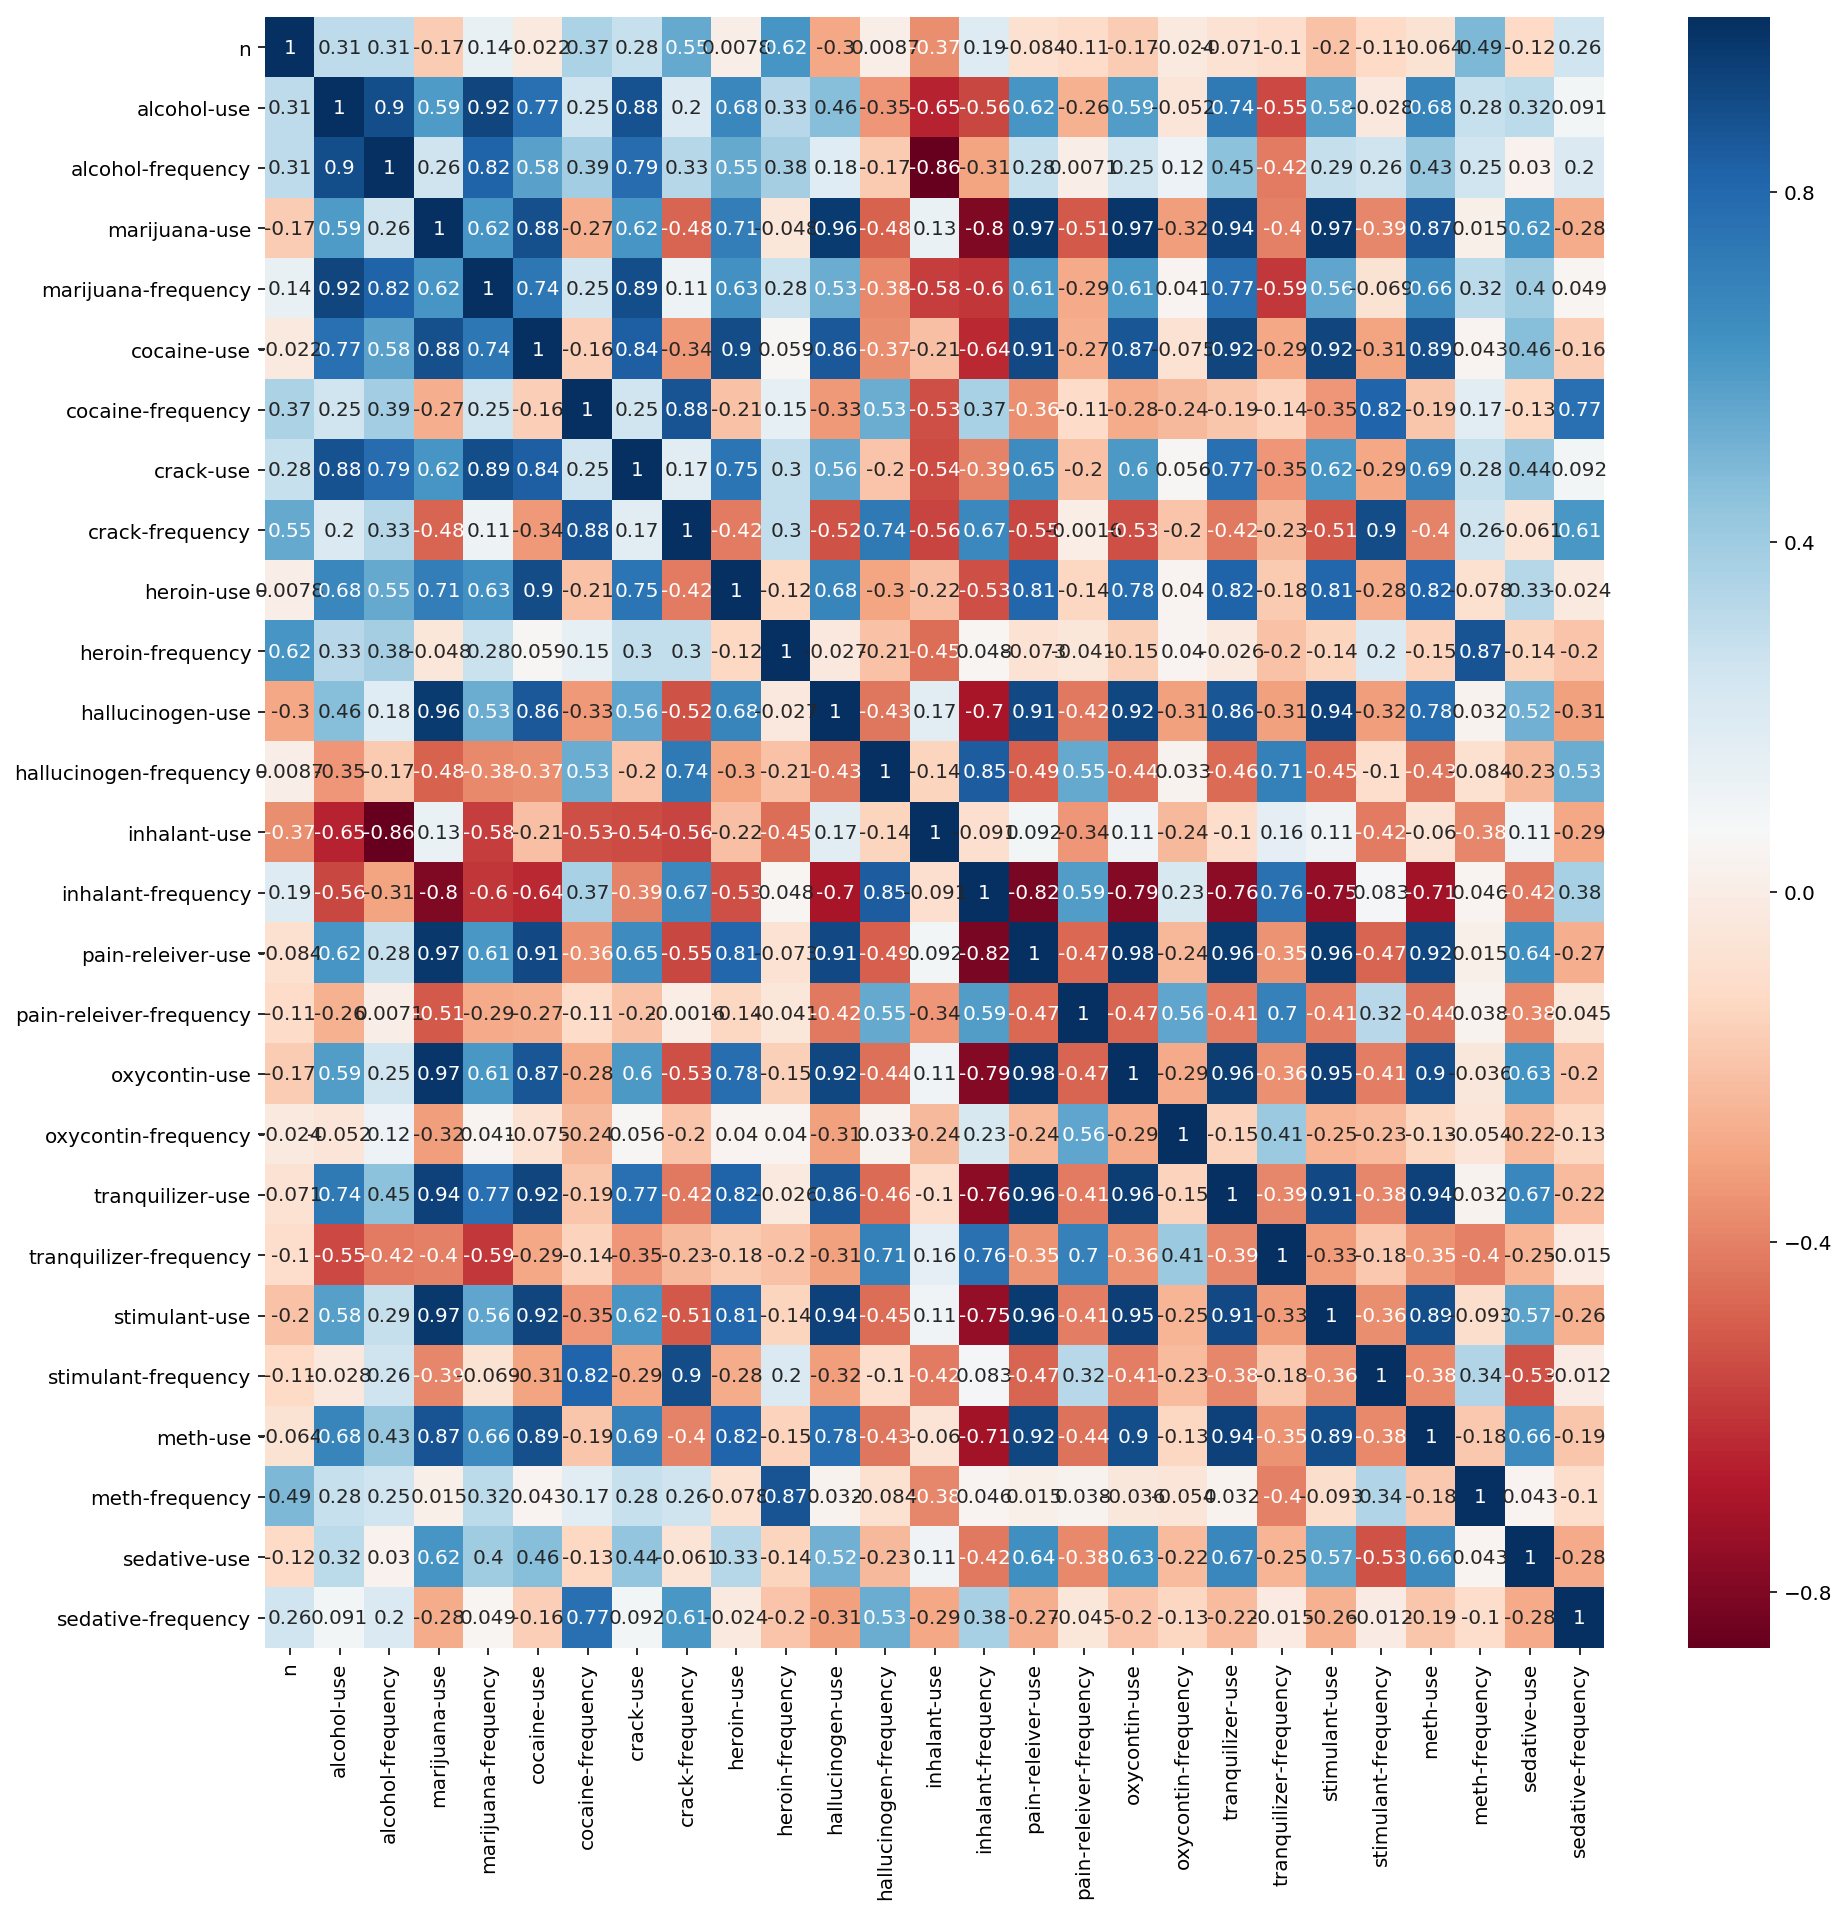

In [278]:
ax=plt.figure(figsize=(15,15))
sns.heatmap(drug.corr(),annot=True,cmap="RdBu")

<div class="alert alert-block alert-info">
<b> Observations </b>
</div>

This correlation matrix describes pair-wise correlation between the drug usage statistics across different age groups. 

For example, pairwise correlation of `alcohol-use` and `alcohol-frequency` is 0.9. So there is a strong (possibly linear) correlation between the median number of alcohol users and percentage of alcohol users across different age groups. 

The upper quadrant of the correlation matrix is largely blue, indicating that there is strong correlationship between the variables in the top upper left. This indicates that across different age groups, there is a possible relationship between frequency and prevalence of drug use, especially for what are considered to be "gateway" drugs such as alcohol and marijuana.

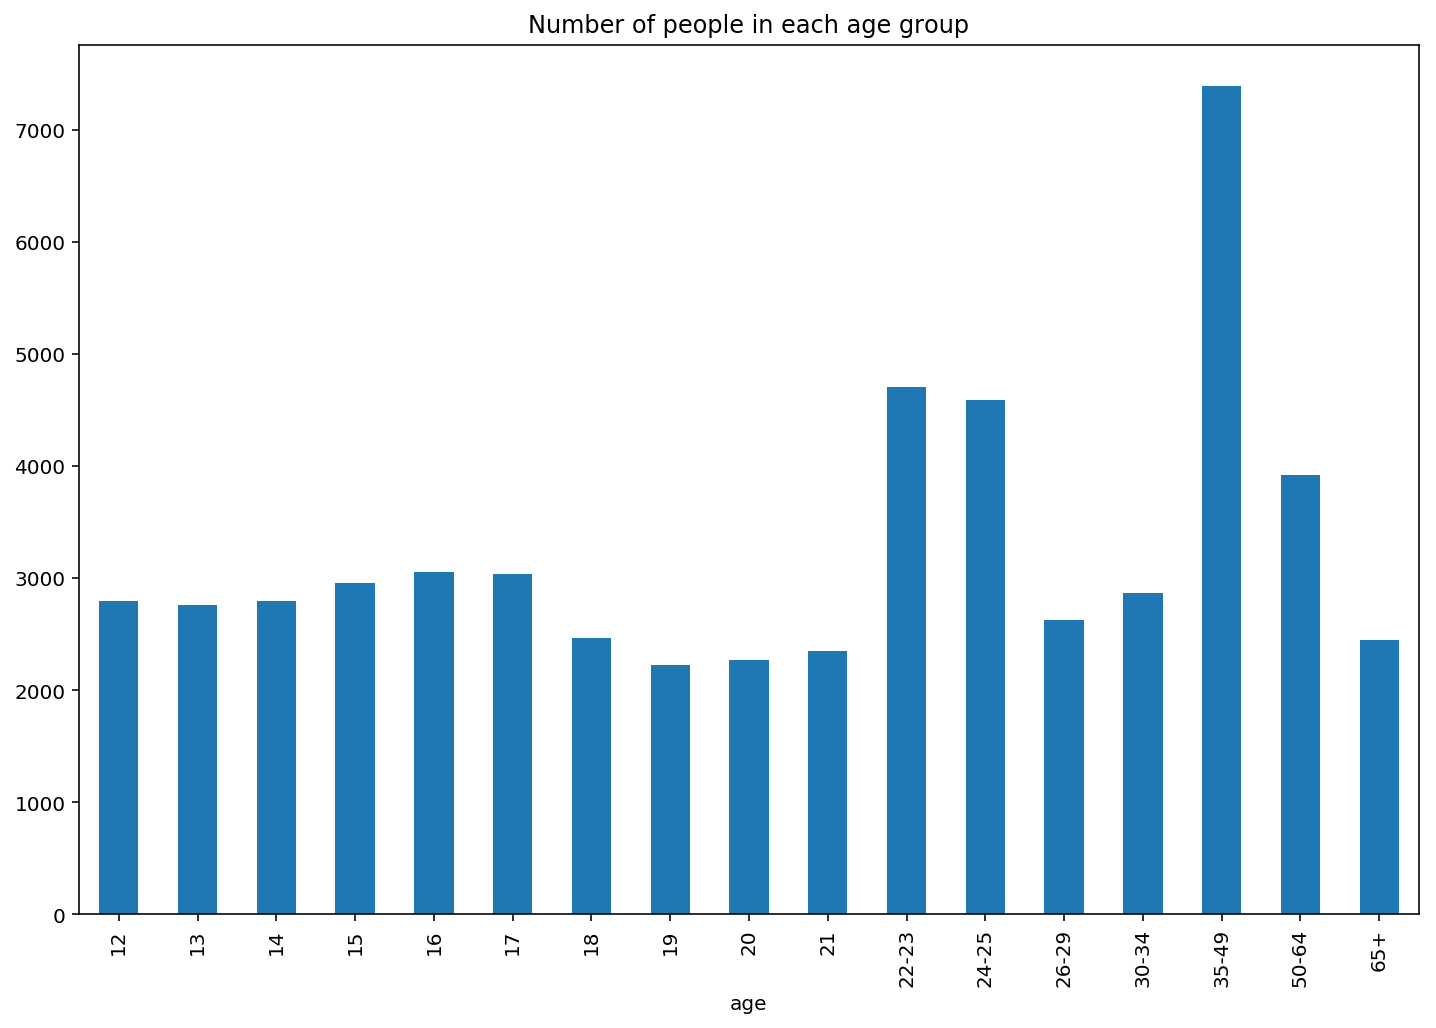

In [279]:
# Look at the distribution of n #

f,ax=plt.subplots(1,1,figsize=(12,8))
drug.plot.bar(x='age',y='n',ax=ax)
ax.set_title('Number of people in each age group')
ax.get_legend().remove()

<div class="alert alert-block alert-info">
<b> Observations </b>
</div>


While we have the sample proportions of users from each age group, we should see if the groups are equally sized. In this case, the 35-49 age group is much larger, given tha it has the largest age range. The age groups also have unequal ranges, so we will have to treat them as ordinal variables rather than continuous variables. It might also be more instructive to "collapse" the proportion columns and look at frequencies instead of proportions.


In [280]:
## Generate a frequency table from proportions ## 

# Split the dataset into two - frequency and median statistics # 
drug_ppn=drug[['age', 'n', 'alcohol-use', 'marijuana-use','cocaine-use',\
               'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use',\
               'pain-releiver-use',  'oxycontin-use', 'tranquilizer-use', \
               'stimulant-use','meth-use', 'sedative-use']]

## Frequency table ## 
drug_num=drug_ppn
for a in drug_num.columns[2:]:
    drug_num[a.split('-')[0]+'-num']=round(drug_ppn['n']*drug_ppn[a]/100)
    
## Median table ## 
drug_freq=drug[['age', 'n', 'alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency',\
                'crack-frequency', 'heroin-frequency', 'hallucinogen-frequency',\
                'inhalant-frequency','pain-releiver-frequency', 'oxycontin-frequency',\
                'tranquilizer-frequency','stimulant-frequency',  'meth-frequency','sedative-frequency']]


In [281]:
# Drop the unnecessary columns for plotting # 

drug_num.drop(['n','alcohol-use', 'marijuana-use','cocaine-use',\
               'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use',\
               'pain-releiver-use',  'oxycontin-use', 'tranquilizer-use', \
               'stimulant-use','meth-use', 'sedative-use'],axis=1,inplace=True)

drug_freq.drop(['n'],axis=1,inplace=True)

In [282]:
# Sort values by mean of age group # 

drug_num_sorted=drug_num.reindex_axis(drug_num.mean().sort_values(ascending=False).index, axis=1)
drug_freq_sorted=drug_freq.reindex_axis(drug_freq.mean().sort_values(ascending=False).index, axis=1)

In [283]:
drug_freq_sorted.columns

Index(['heroin-frequency', 'marijuana-frequency', 'meth-frequency',
       'alcohol-frequency', 'stimulant-frequency', 'sedative-frequency',
       'crack-frequency', 'oxycontin-frequency', 'pain-releiver-frequency',
       'tranquilizer-frequency', 'hallucinogen-frequency', 'cocaine-frequency',
       'inhalant-frequency'],
      dtype='object')

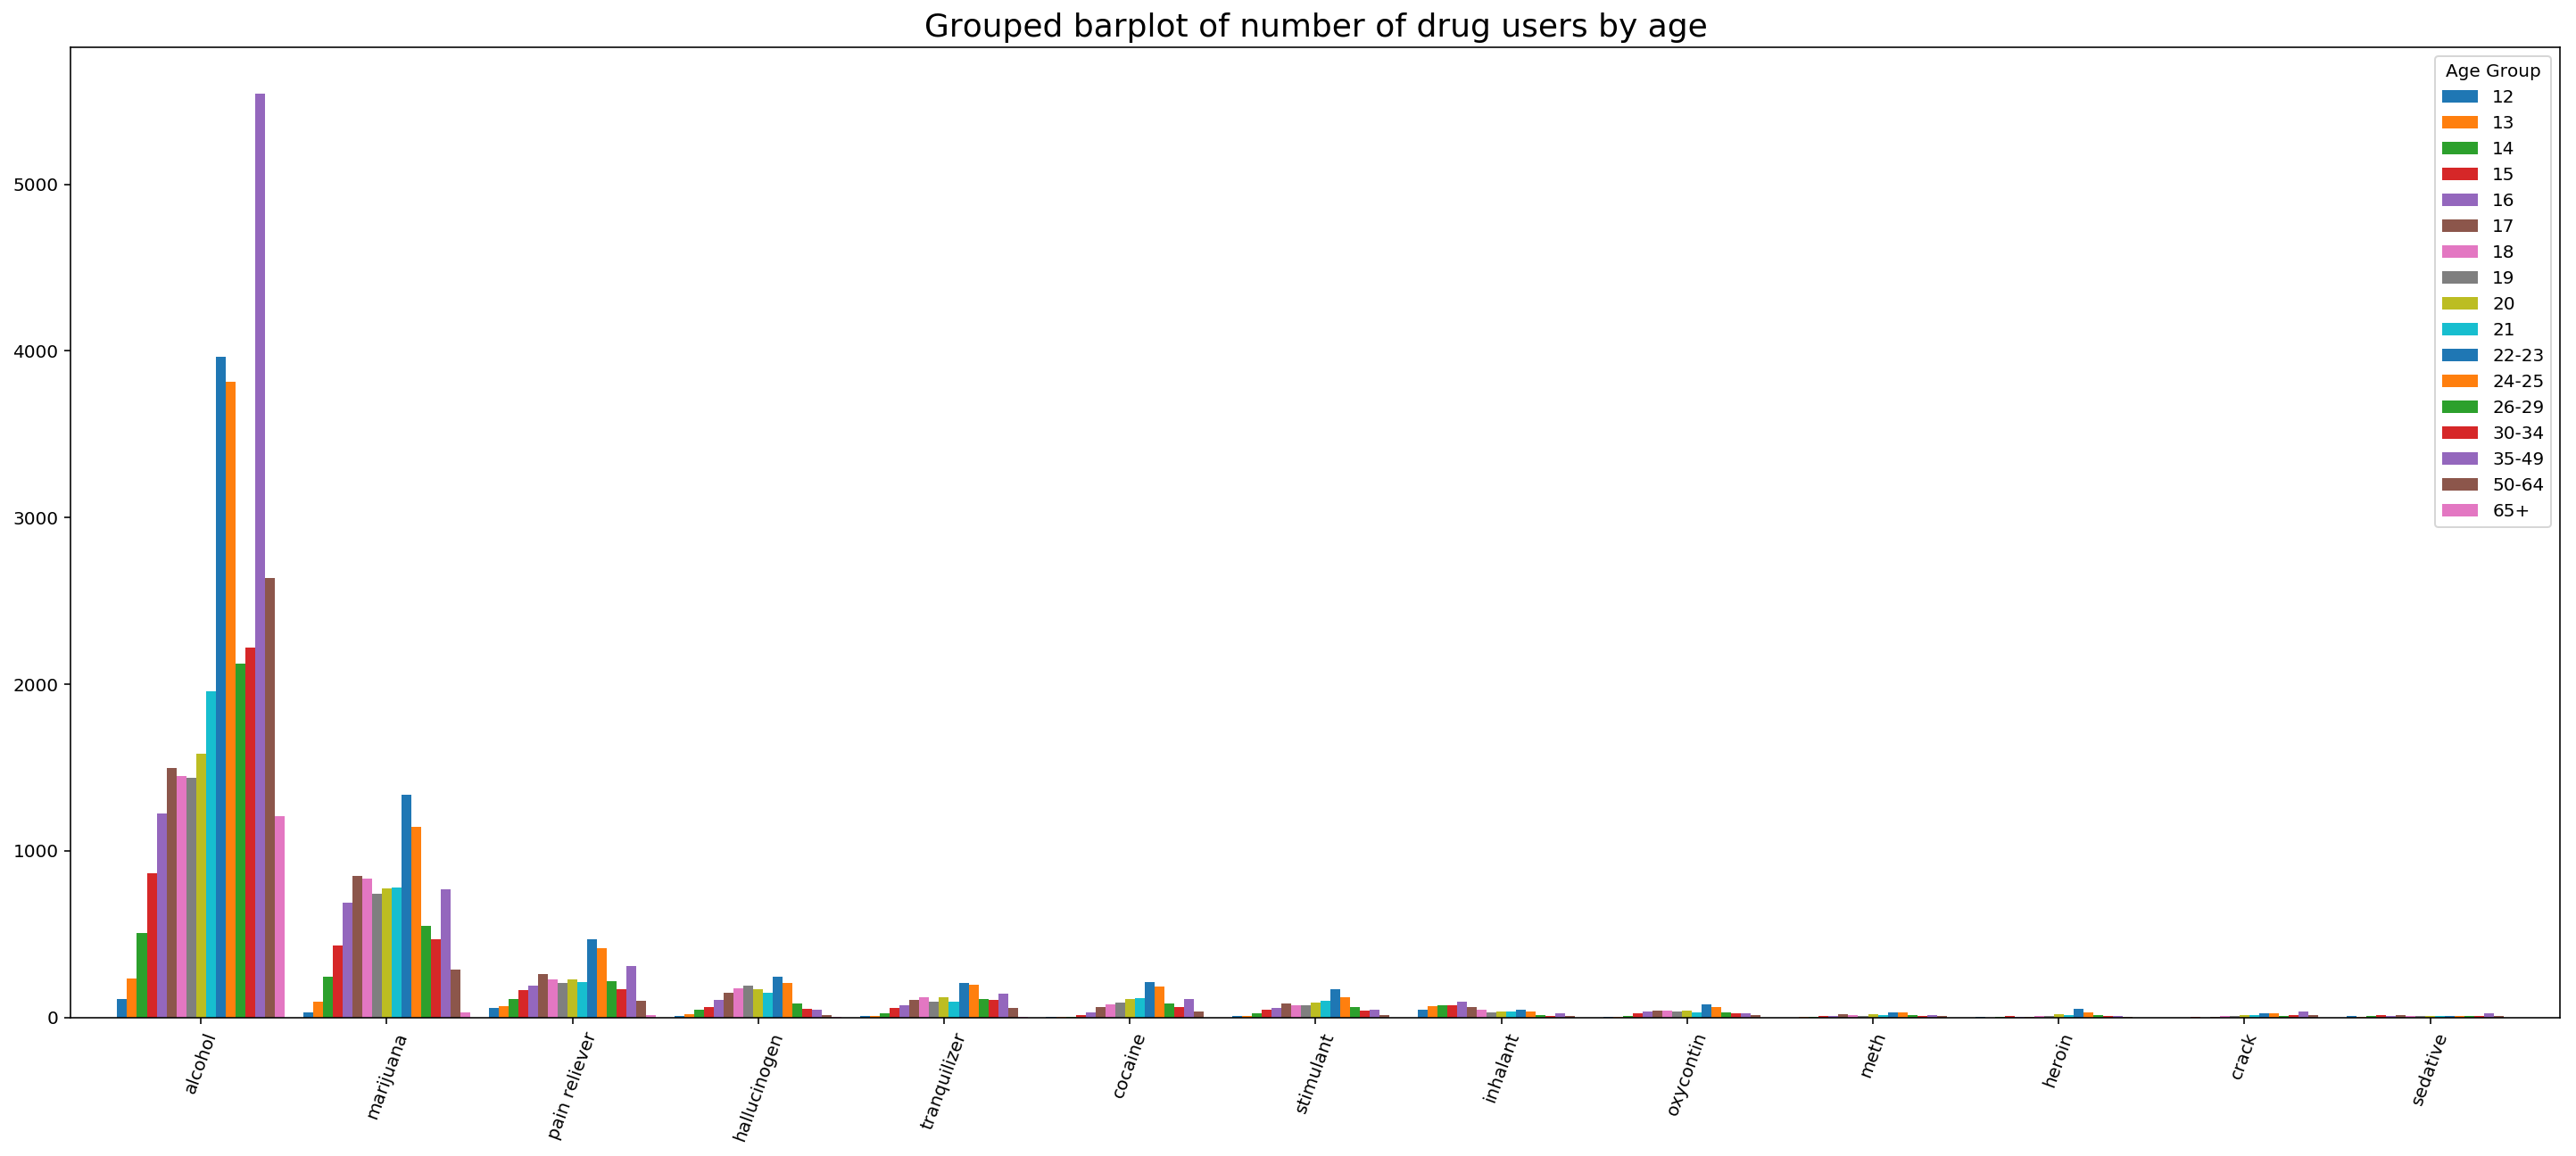

In [284]:
# Grouped barplot # 

drug_types_num=['alcohol','marijuana','pain reliever','hallucinogen','tranquilizer','cocaine','stimulant','inhalant','oxycontin','meth','heroin','crack','sedative']
ax=drug_num_sorted.T.plot.bar(figsize=(25,10),width=0.9)
ax.legend(title='Age Group',labels=drug_ppn['age'],fontsize=10)
ax.set_title('Grouped barplot of number of drug users by age',fontsize=18)
ax.set_xticklabels(drug_types_num,rotation=70)

plt.show()

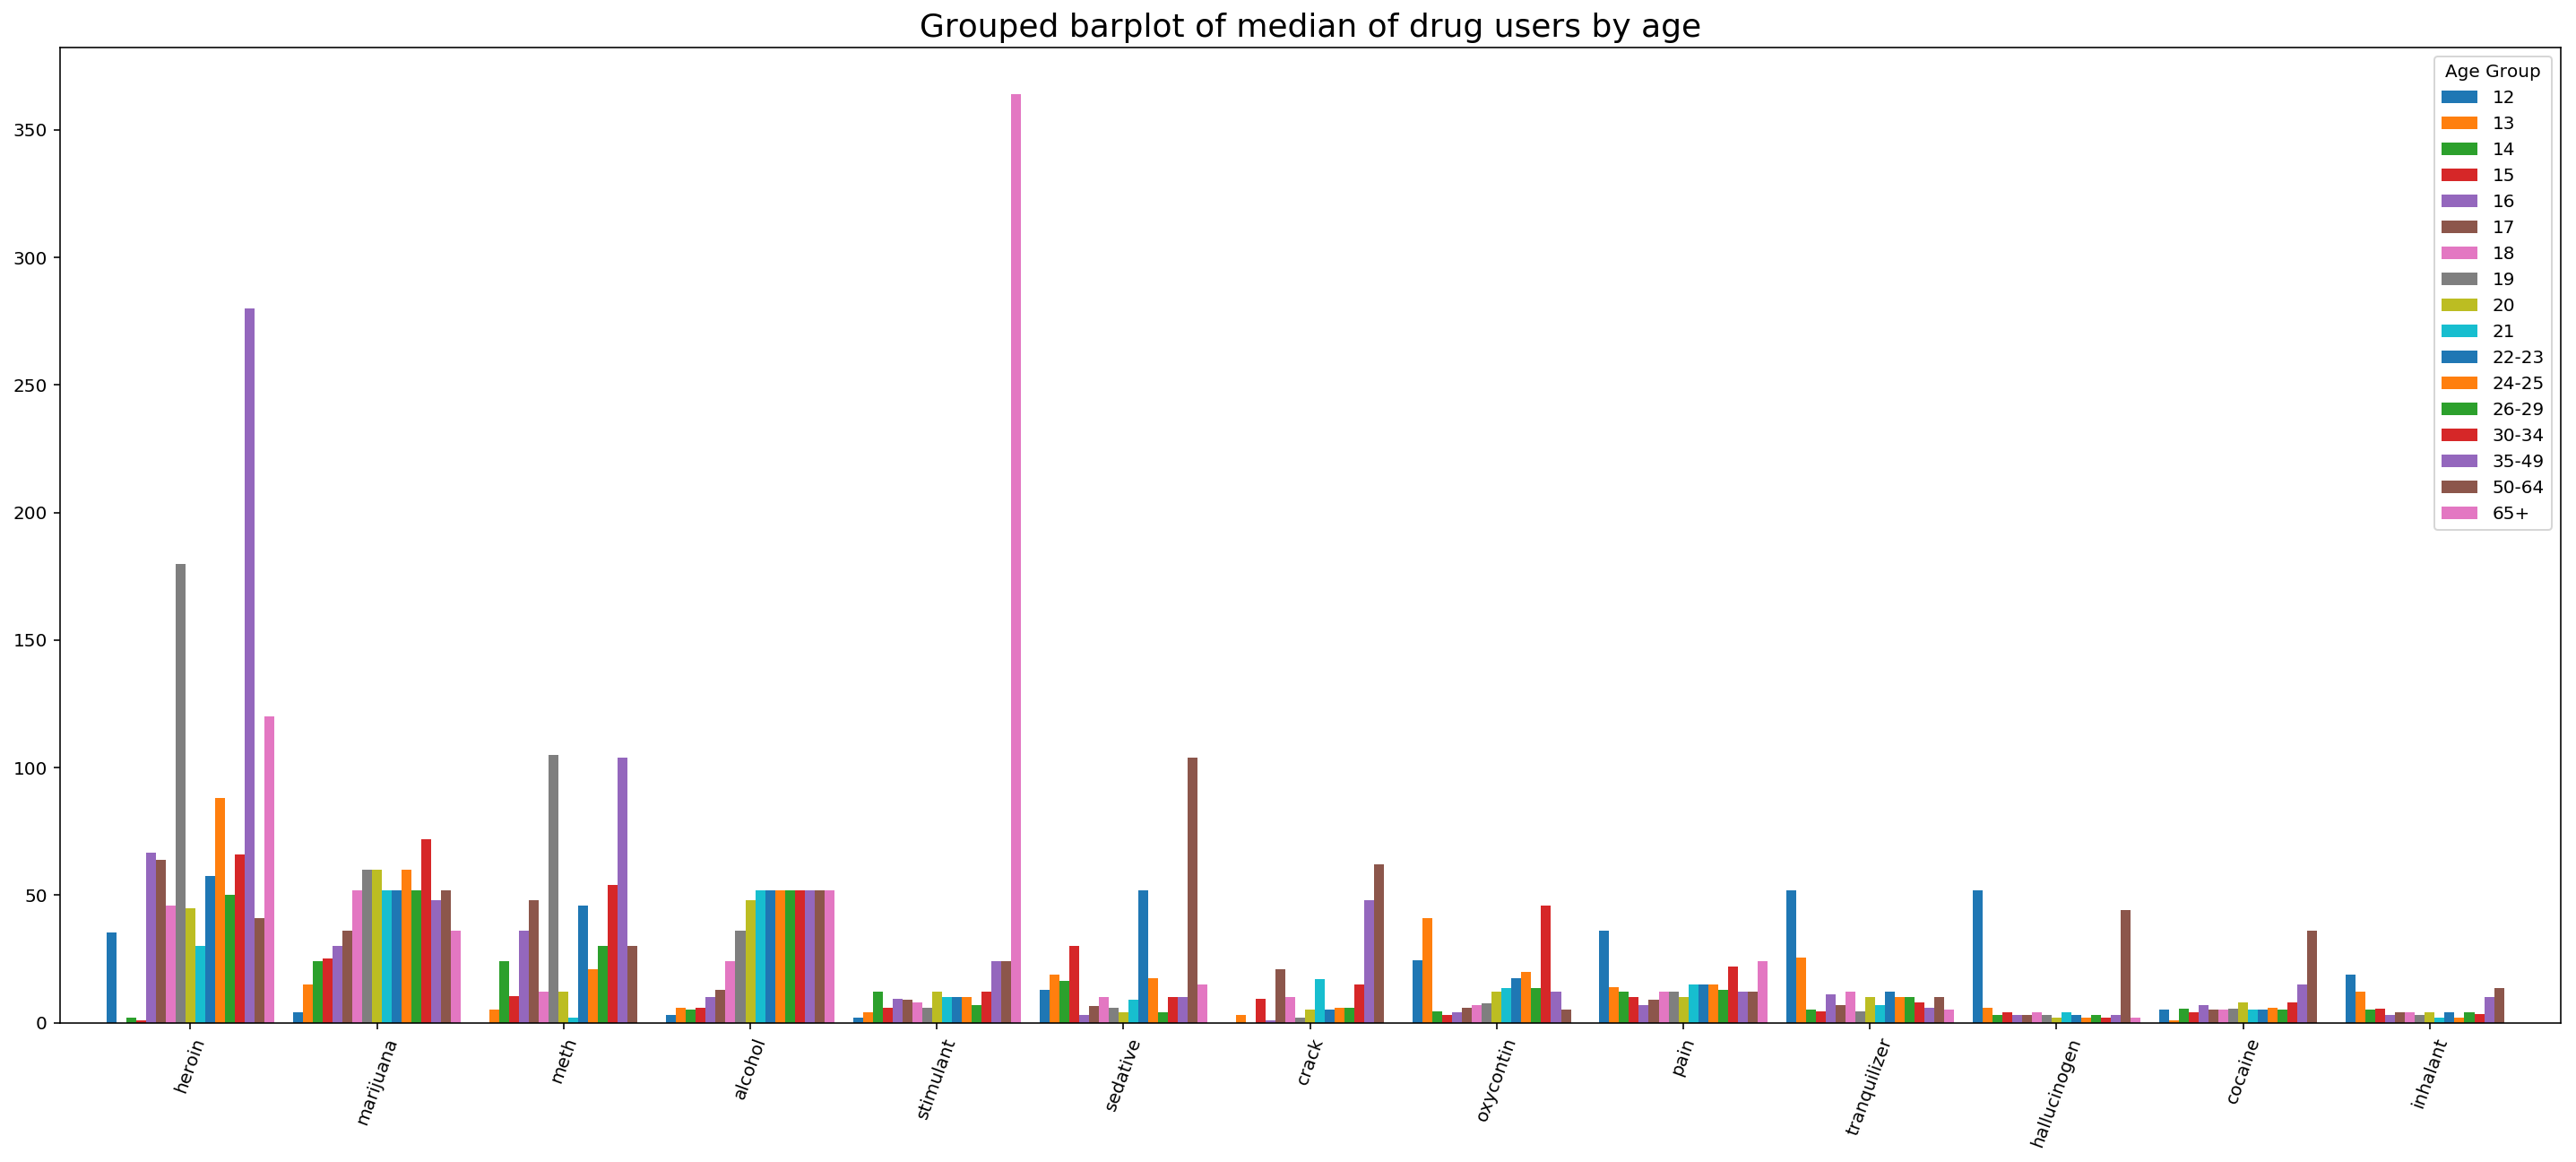

In [285]:
drug_types_med=[x.split('-')[0] for x in drug_freq_sorted.columns]
ax=drug_freq_sorted.T.plot.bar(figsize=(25,10),width=0.9)
ax.legend(title='Age Group',labels=drug_ppn['age'],fontsize=10)
ax.set_title('Grouped barplot of median of drug users by age',fontsize=18)
ax.set_xticklabels(drug_types_med,rotation=70)
plt.show()

<div class="alert alert-block alert-info">
<b> Observations </b>
</div>


The first grouped bar plot shows the number of drug users across the different classes of drugs, by age groups. This is a measure of the prevalence of the drug. As expected, when ordered by mean across age groups, the most commonly abused drugs are drugs such as alcohol, marijuana and pain relievers, which are most "accessible" in the market. The within-drug-class distribution across age groups are fairly similar, with a general upward relationship in drug prevalence as age groups increase. 

The second barplot shows the median number of times drug user used, across different different classes of drugs, by age groups. This is a measure of the frequency of usage of the drugs, or a proxy for how addictive a drug can be. The most frequently used drugs, by mean across age groups are heroin, marijuana and meth, which are known to be highly addictive compared to other narcotics. There is no apparent relationship between age and usage. There is a notable outlier for median stimulant usage in the highest age category of 65+. 

In [ ]:
drug_comb=drug_freq.merge(drug_num,how='left',on='age')

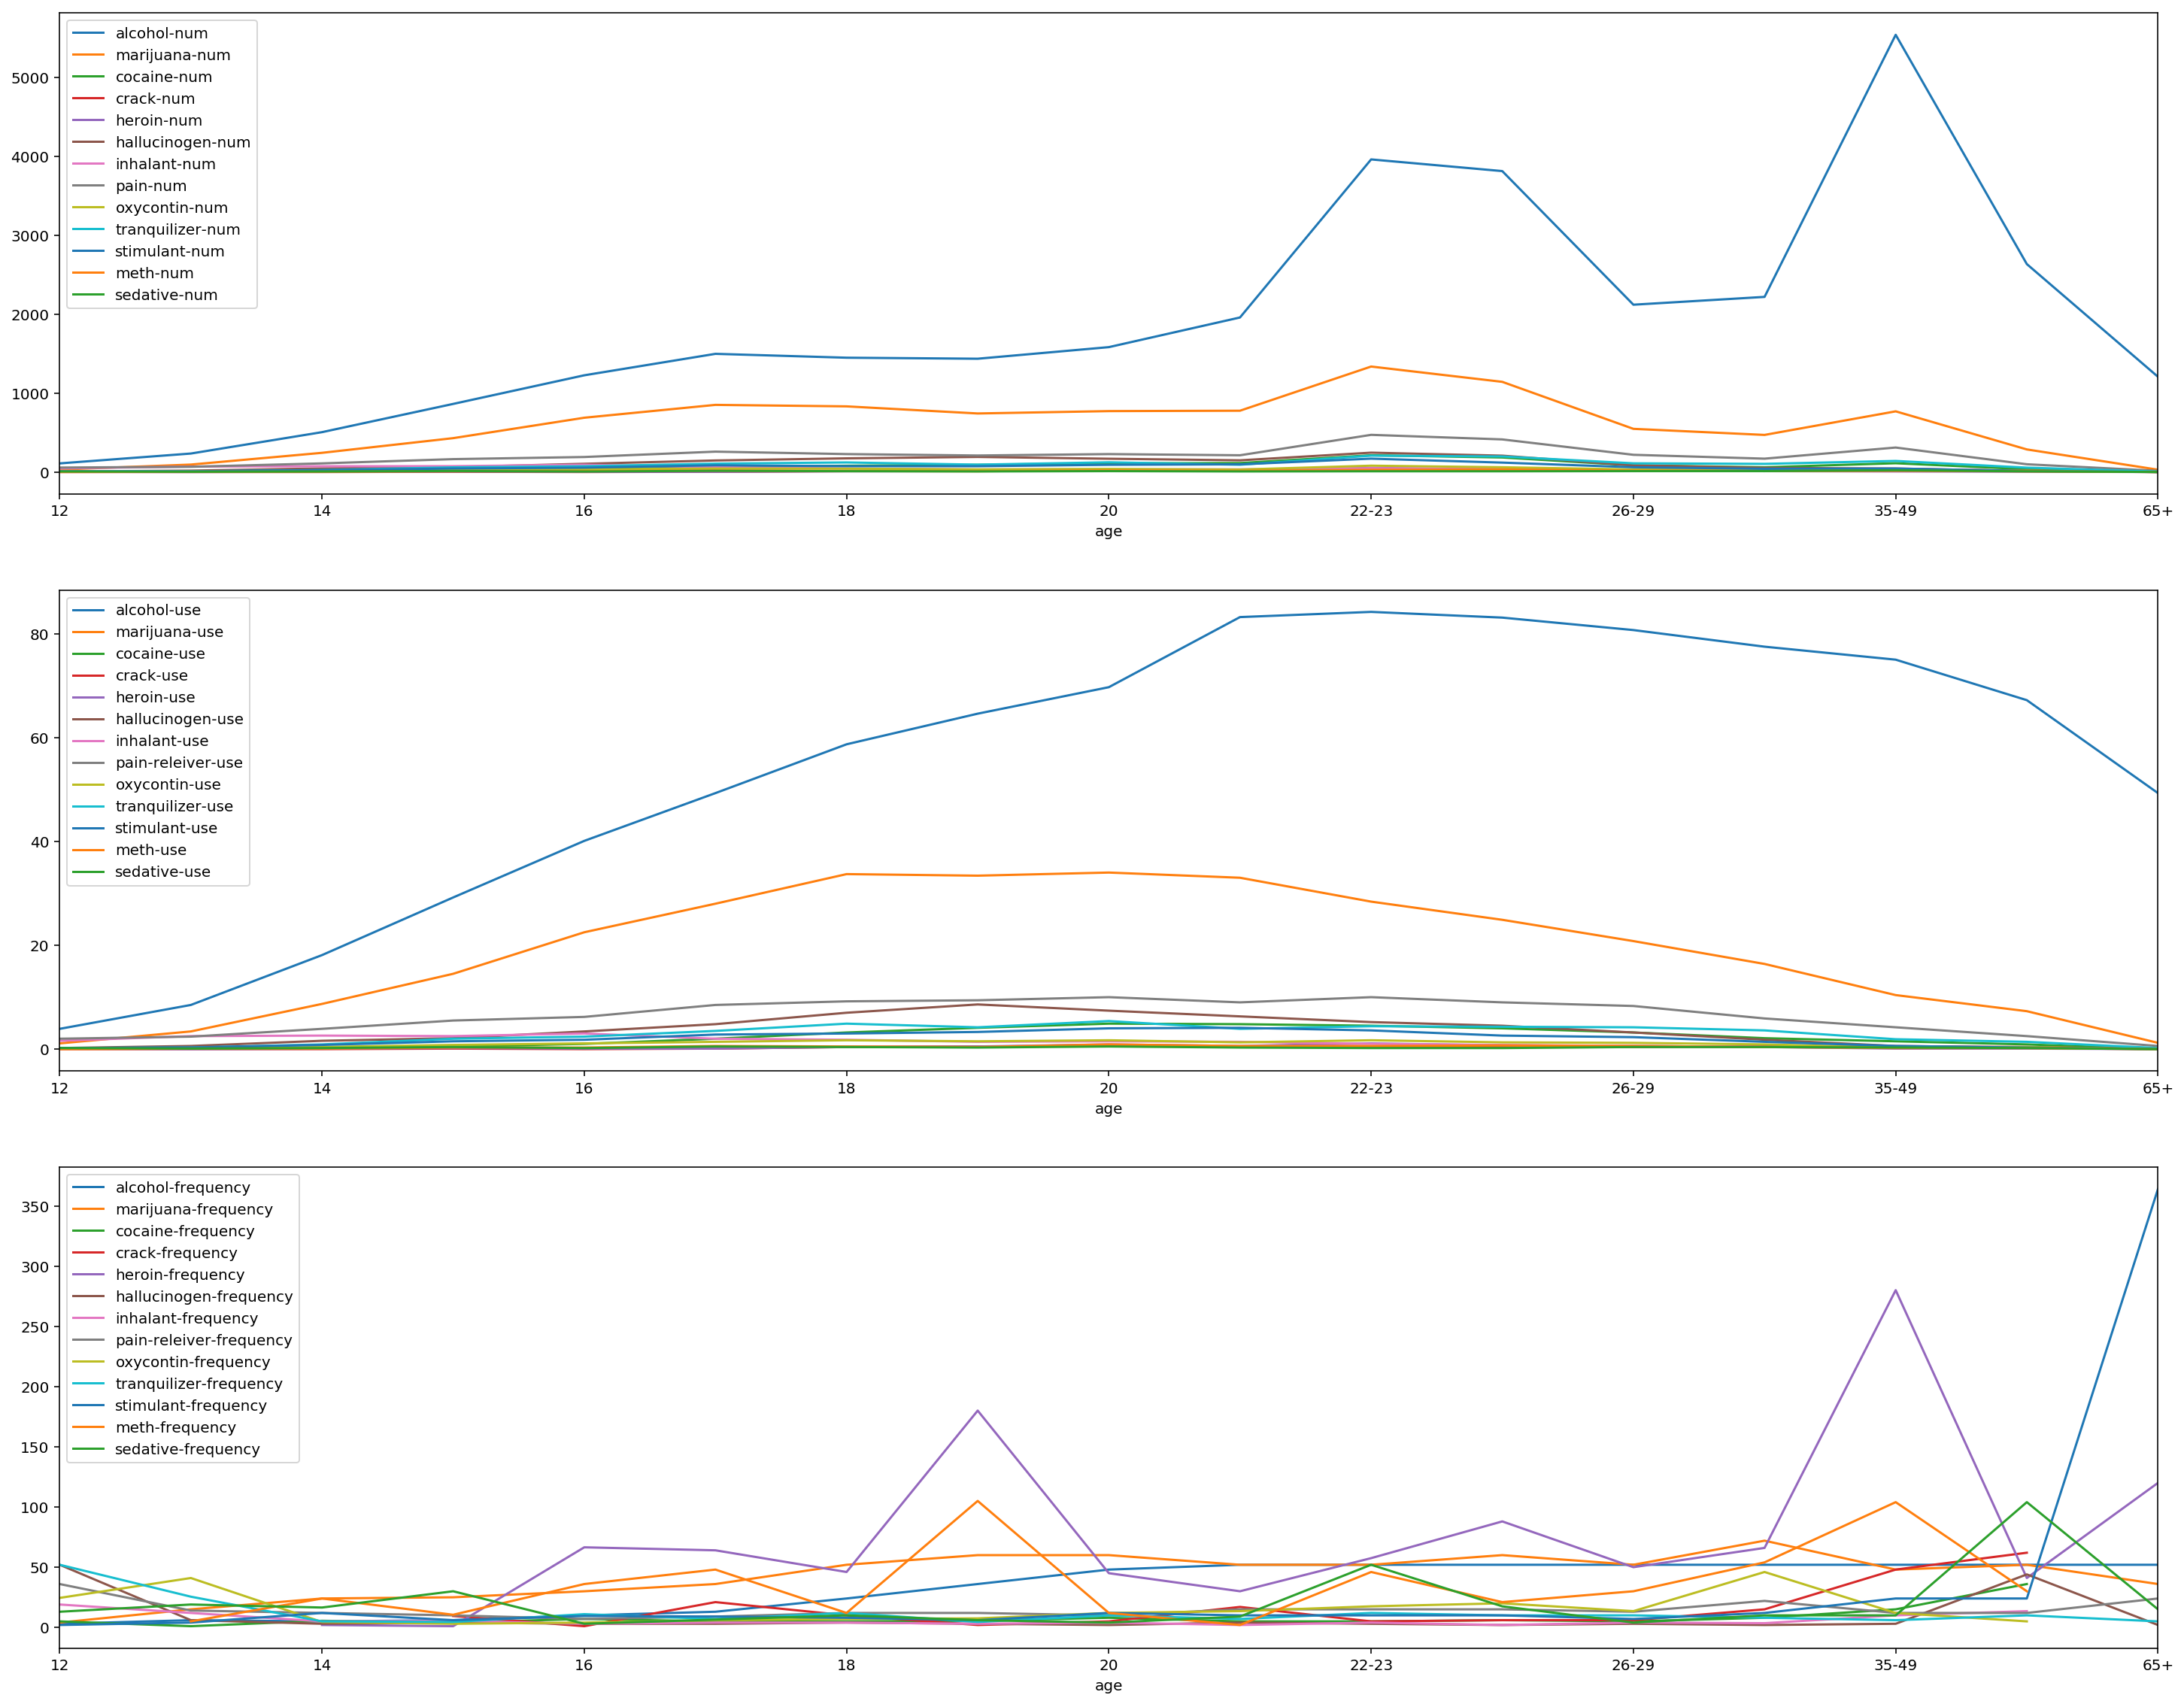

In [124]:
f,ax=plt.subplots(3,1,figsize=(25,20))

drug_num.plot(x='age',y=['alcohol-num', 'marijuana-num', 'cocaine-num', 'crack-num',
       'heroin-num', 'hallucinogen-num', 'inhalant-num', 'pain-num',
       'oxycontin-num', 'tranquilizer-num', 'stimulant-num', 'meth-num',
       'sedative-num'],ax=ax[0])
drug_ppn.plot(x='age',y=['alcohol-use', 'marijuana-use','cocaine-use',\
               'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use',\
               'pain-releiver-use',  'oxycontin-use', 'tranquilizer-use', \
               'stimulant-use','meth-use', 'sedative-use'],ax=ax[1])
drug_freq.plot(x='age',y=['alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency',\
                'crack-frequency', 'heroin-frequency', 'hallucinogen-frequency',\
                'inhalant-frequency','pain-releiver-frequency', 'oxycontin-frequency',\
                'tranquilizer-frequency','stimulant-frequency',  'meth-frequency','sedative-frequency'],ax=ax[2])

plt.show()

<div class="alert alert-block alert-info">
<b> Observations </b>
</div>


Looking closer at the relationship between age and drug use and prevalence, we can confirm using line plots that there is generally a positive relationship between age and alcohol prevalence - but this is not so apparent for other drug classes. It also might be worth noting that there is a visual positive relationship between marijuana prevalence and age in the teen years, ie. 12-20. 

There is no clear visual pattern between drug usage and age, evident from the last line plot. 


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

<div class="alert alert-block alert-info">
<b> Questions and Deliverables </b>
</div>

I would like to test if the proportion of alcohol users in the 26-29 age group is significantly different from the 30-34 age group. 

My null hypothesis is $ H_0: p_1 = p_2$ where $p_1$ refers to the proportion of alcohol users in the 26-29 age group, and $p_2$ refers to the proportion of alcohol users in 30-34 age group.

Under  $H_0$, a Z-score test statistic is normally distributed for sufficiently large $n$: 

$ \large{Z= \frac {\hat p_1 - \hat p_2}{\sqrt[2]{ \hat p(1-\hat p)(1/n_1+1/n_2)}}} \backsim N(0,1) $

Where $\hat p$ is the grand proportion over the two groups. 

At a 95% confidence level, I will reject the null hypothesis if $Z>1.96$ and conclude that the proportion of alcohol users in the 26-29 age group is signficantly different from the 30-34 age group. 

In [160]:
# Code for hypothesis test # 

from scipy import stats

# Sample proportion estimates and sample sizes #
p_1=drug.ix[12,'alcohol-use']/100
p_2=drug.ix[13,'alcohol-use']/100
n_1=drug.ix[12,'n']
n_2=drug.ix[13,'n']

print('Sample proportion for the 26-29 age group is %.2f' % p_1)
print('Sample proportion for the 30-34 age group is %.2f' % p_2)
# Grand proportion # 
p=(p_1*n_1+p_2*n_2)/(n_1+n_2)

# Z-score # 
Z= (p_1-p_2)/(p*(1-p)*(1/n_1+1/n_2))**0.5

# P-value #
p_val=1-stats.norm.cdf(Z)

print ('The Z-score for the test is %.2f and the p-value for the test is %.3f' %(Z,p_val))

Sample proportion for the 26-29 age group is 0.81
Sample proportion for the 30-34 age group is 0.78
The Z-score for the test is 2.91 and the p-value for the test is 0.002


<div class="alert alert-block alert-info">
<b> Report </b>
</div>


Since the Z-score of the test is 2.91 and is above the critical value of 1.96, we can conclude that the proportion of alcohol users for the 26-29 age group is significantly higher than the 30-34 age group at a 95% confidence level.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [178]:
rate=df['Rate']

# Define outliers as observations that lie 1.5 standard deviations away from the sample mean #
upper=rate.mean()+1.5*rate.std()
lower=rate.mean()-1.5*rate.std()
outly=rate.between(lower,upper)

# Print the outliers # 
df[-outly]


,State,Rate,Verbal,Math,Verbal_norm,Math_norm,Rate_norm
0,CT,82,509,510,-0.692595,-0.596974,1.642609
1,NJ,81,499,513,-0.993471,-0.513675,1.605981
2,MA,79,511,515,-0.632419,-0.458143,1.532726


In [192]:
# Mean, Median, Standard Deviation without outliers # 

print('Sample Means:')
print(round(df[outly].mean(),2))
print('Sample Medians:')
print(round(df[outly].median(),2))
print('Sample Standard Deviations:')
print(round(df[outly].std(),2))


Sample Means:
Rate            34.49
Verbal         533.59
Math           532.65
Verbal_norm      0.05
Math_norm        0.03
Rate_norm       -0.10
dtype: float64
Sample Medians:
Rate            31.00
Verbal         527.00
Math           526.00
Verbal_norm     -0.15
Math_norm       -0.15
Rate_norm       -0.23
dtype: float64
Sample Standard Deviations:
Rate           25.81
Verbal         33.59
Math           36.80
Verbal_norm     1.01
Math_norm       1.02
Rate_norm       0.95
dtype: float64


In [193]:
# Mean, Median, Standard Deviation with outliers # 

print('Sample Means:')
print(round(df.mean(),2))
print('Sample Medians:')
print(round(df.median(),2))
print('Sample Standard Deviations:')
print(round(df.std(),2))


Sample Means:
Rate            37.15
Verbal         532.02
Math           531.50
Verbal_norm      0.00
Math_norm       -0.00
Rate_norm        0.00
dtype: float64
Sample Medians:
Rate            33.50
Verbal         526.50
Math           521.00
Verbal_norm     -0.17
Math_norm       -0.29
Rate_norm       -0.13
dtype: float64
Sample Standard Deviations:
Rate           27.30
Verbal         33.24
Math           36.01
Verbal_norm     1.00
Math_norm       1.00
Rate_norm       1.00
dtype: float64


<div class="alert alert-block alert-info">
<b> Answer </b>
</div>

For all mean, median and standard deviation, the removal of outliers in "Rank" affects the "Rank" variable the most and not the other variables. 

The removal of outliers changes the sample mean of "Rank" most significantly (decrease by 2.6). It affected the median to a smaller extent (decrease by 2.4).

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


<div class="alert alert-block alert-info">
<b> Answer </b>
</div>


Spearman's correlation is a non-parametric method of measuring the relationship between two random variables. Pearson's correlation relies on calculating the product of moments, ie. $ \rho_{x,y} = \frac{E(X-\mu)E(Y-\mu)}{\sigma_x \sigma_y}$. Spearman rho can measure the strength of association for two variables associated monotonically. However, Pearson's rho measures the strength of a linear association. 

To calculate Spearman's rank correlation between two variables $X_i$ and $Y_i$ for $i=1,...,n$ :

1. Rank $X_i$ and $Y_i$ respectively for all $i=1,...,n$, generating $rank(X_i)$ and $rank(Y_i)$
2. In the case of ties, take the average of tied values and assigned the average rank for all tied $X_i$,$Y_i$
3. Calculate the difference and squared difference, $d_i$ and $d_i^2$ for each $i-th$ pair of observations
4. Obtain Spearman's correlation,
$\large r_s = 1 - \frac{6\sum_{i=1}^n d_i^2}{n(n^2-1)} $


In [198]:
print('Pearson correlation is %.2f and Spearman correlation is %.2f' % (df[['Verbal','Math']].corr().ix[0,1],df[['Verbal','Math']].corr(method='spearman').ix[0,1]))

Pearson correlation is 0.90 and Spearman correlation is 0.91


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [206]:
# Convert Rate to percentiles # 
df['percentile_rate']=rate.apply(lambda x:stats.percentileofscore(rate,x))

In [221]:
# Percentile of California in rate # 

df[['State','percentile_rate']].loc[df['State']=='CA',]

,State,percentile_rate
23,CA,56.730769


<div class="alert alert-block alert-info">
<b> Answer </b>
</div>

Percentile is equivalent to rank, but scaled to between 1 to 100. 

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

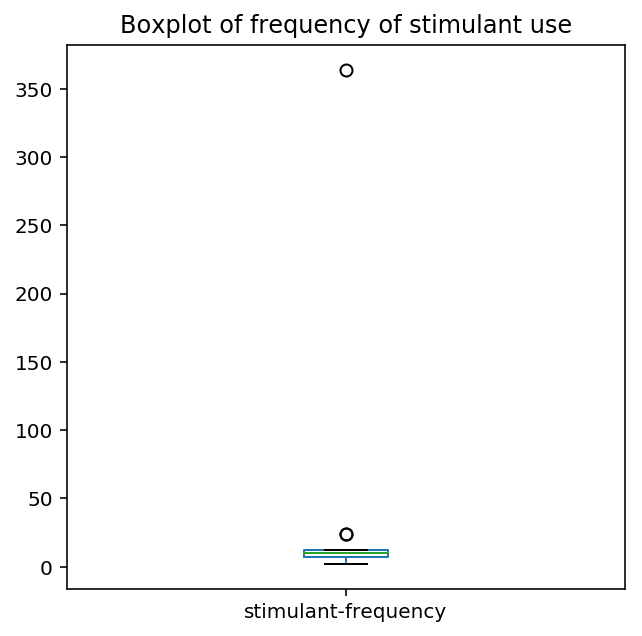

In [287]:
# Distribution of median of stimulant use across age-groups # 

ax=drug_freq['stimulant-frequency'].plot.box(figsize=(5,5))
ax.set_title('Boxplot of frequency of stimulant use')
plt.show()

In [289]:
# Convert percentile scored for median stimulant usage frequency # 

drug_freq['stim-freq-pctile']=drug_freq['stimulant-frequency'].apply(lambda x:stats.percentileofscore(drug_freq['stimulant-frequency'],x))

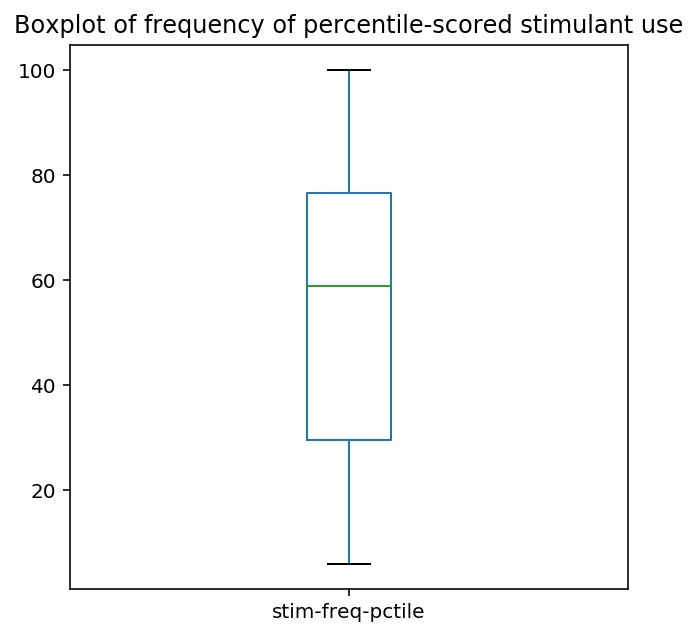

In [290]:
# Distribution of percentile scored median stimulant usage frequency # 

ax=drug_freq['stim-freq-pctile'].plot.box(figsize=(5,5))
ax.set_title('Boxplot of frequency of percentile-scored stimulant use')
plt.show()

<div class="alert alert-block alert-info">
<b> Answer </b>
</div>

Percentile scoring brings the values of the distribution to between 0 to 100. Visually, it "stretches" the distribution so that outliers are brought within a smooth distribution.

Ranking the observations using percentile scores will take into the direction of correlation even for  outliers, as in the Spearman's correlation coefficient. However, using raw observations could generate a heavily skewed distribution. 